<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Neural Networks - Module Project-I | Signal Strength Regressor</span></h1>

<ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Electronics and Telecommunication</span>
    </li>
</ul>
<p><br></p>

<ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters. </font>
</article>

<ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong></span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The data set contains information on various signal tests performed:
<br>1. Parameters: Various measurable signal parameters.
<br>2. Signal_Quality: Final signal strength or quality</span></article>

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We will build a regressor which can use these parameters to determine the signal strength or
quality [as number].</span></p>
<p><br></p>

In [1]:
# imports

import h5py
import tensorflow
import warnings
from time import time
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

%matplotlib inline

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import the data.</span></strong></li>
</ul>

In [2]:
df = pd.read_csv('Part- 1,2&3 - Signal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df.sample(7)

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
840          11.1         0.42         0.47         2.65        0.085   
313           8.6         0.47         0.30         3.00        0.076   
1471          6.7         0.70         0.08         3.75        0.067   
194           7.6         0.55         0.21         2.20        0.071   
225           7.7         0.43         0.25         2.60        0.073   
666           8.3         0.49         0.36         1.80        0.222   
879           7.2         0.60         0.04         2.50        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
840           9.0         34.0      0.99736         3.24          0.77   
313          30.0        135.0      0.99760         3.30          0.53   
1471          8.0         16.0      0.99334         3.43          0.52   
194           7.0         28.0      0.99640         3.28          0.55   
225          29.0         63.0      0.99615         3.37          0.58   
666           6.0         16.0      0.99800         3.18          0.60   
879          18.0         88.0      0.99745         3.53          0.55   

      Parameter 11  Signal_Strength  
840           12.1                7  
313            9.4                5  
1471          12.6                5  
194            9.7                5  
225           10.5                6  
666            9.5                6  
879            9.5                5

In [4]:
# From a completeness point of view, the data looks great and there are no missing values.
# no missing values, no need to impute or drop any data points
df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [5]:
df.Signal_Strength.value_counts() # 6 Unique values with imblanced classes

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

In [6]:
df.describe().T.style.background_gradient('Greens')

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Data analysis & visualisation</span></strong></li>
    <ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Perform relevant and detailed statistical analysis on the data.</span></strong></li>
</ul>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Perform relevant and detailed uni, bi and multi variate analysis.</span></strong></li>
</ul>
</ul>

In [7]:
# !pip install exploretransform

import exploretransform as et

In [8]:
et.peek(df) # returns dtype, levels, # of observations, and first five observations for a dataframe

variable    dtype  lvls   obs  \
0       Parameter 1  float64    96  1599   
1       Parameter 2  float64   143  1599   
2       Parameter 3  float64    80  1599   
3       Parameter 4  float64    91  1599   
4       Parameter 5  float64   153  1599   
5       Parameter 6  float64    60  1599   
6       Parameter 7  float64   144  1599   
7       Parameter 8  float64   436  1599   
8       Parameter 9  float64    89  1599   
9      Parameter 10  float64    96  1599   
10     Parameter 11  float64    65  1599   
11  Signal_Strength    int64     6  1599   

                                      head  
0               [7.4, 7.8, 7.8, 11.2, 7.4]  
1             [0.7, 0.88, 0.76, 0.28, 0.7]  
2              [0.0, 0.0, 0.04, 0.56, 0.0]  
3                [1.9, 2.6, 2.3, 1.9, 1.9]  
4      [0.076, 0.098, 0.092, 0.075, 0.076]  
5           [11.0, 25.0, 15.0, 17.0, 11.0]  
6           [34.0, 67.0, 54.0, 60.0, 34.0]  
7   [0.9978, 0.9968, 0.997, 0.998, 0.9978]  
8            [3.51, 3.2, 3.26, 3.16, 3.51]  
9           [0.56, 0.68, 0.65, 0.58, 0.56]  
10               [9.4, 9.8, 9.8, 9.8, 9.4]  
11               [5.0, 5.0, 5.0, 6.0, 5.0]

In [9]:
skew_stats = et.skewstats(df)
skew_stats

dtype  skewness           magnitude
Parameter 4      float64  4.536395              2-high
Parameter 5      float64  5.675017              2-high
Parameter 6      float64  1.249394              2-high
Parameter 7      float64  1.514109              2-high
Parameter 10     float64  2.426393              2-high
Parameter 1      float64  0.981829            1-medium
Parameter 2      float64  0.670962            1-medium
Parameter 11     float64  0.860021            1-medium
Parameter 3      float64  0.318039  0-approx_symmetric
Parameter 8      float64  0.071221  0-approx_symmetric
Parameter 9      float64  0.193502  0-approx_symmetric
Signal_Strength    int64  0.217597  0-approx_symmetric

In [10]:
skew_stats.magnitude.value_counts() # 44 features with high skew

2-high                5
0-approx_symmetric    4
1-medium              3
Name: magnitude, dtype: int64

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Uni-Variate Analysis
</span></p>


In [11]:
# install sweetviz for Auto EDA
# !pip install sweetviz
# or
# !conda install -c conda-forge sweetviz

In [12]:
import sweetviz as sv

uni_report = sv.analyze(df, pairwise_analysis='on')

                                             |                                          | [  0%]   00:00 -> (?…


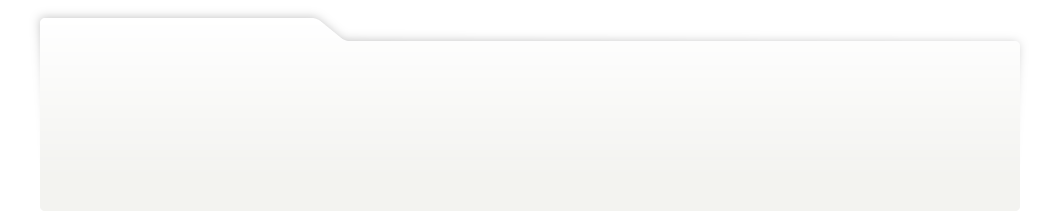
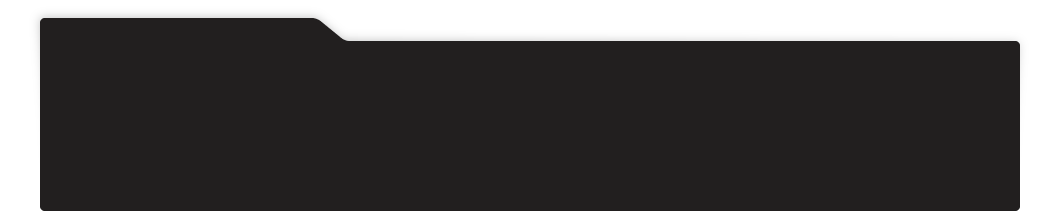
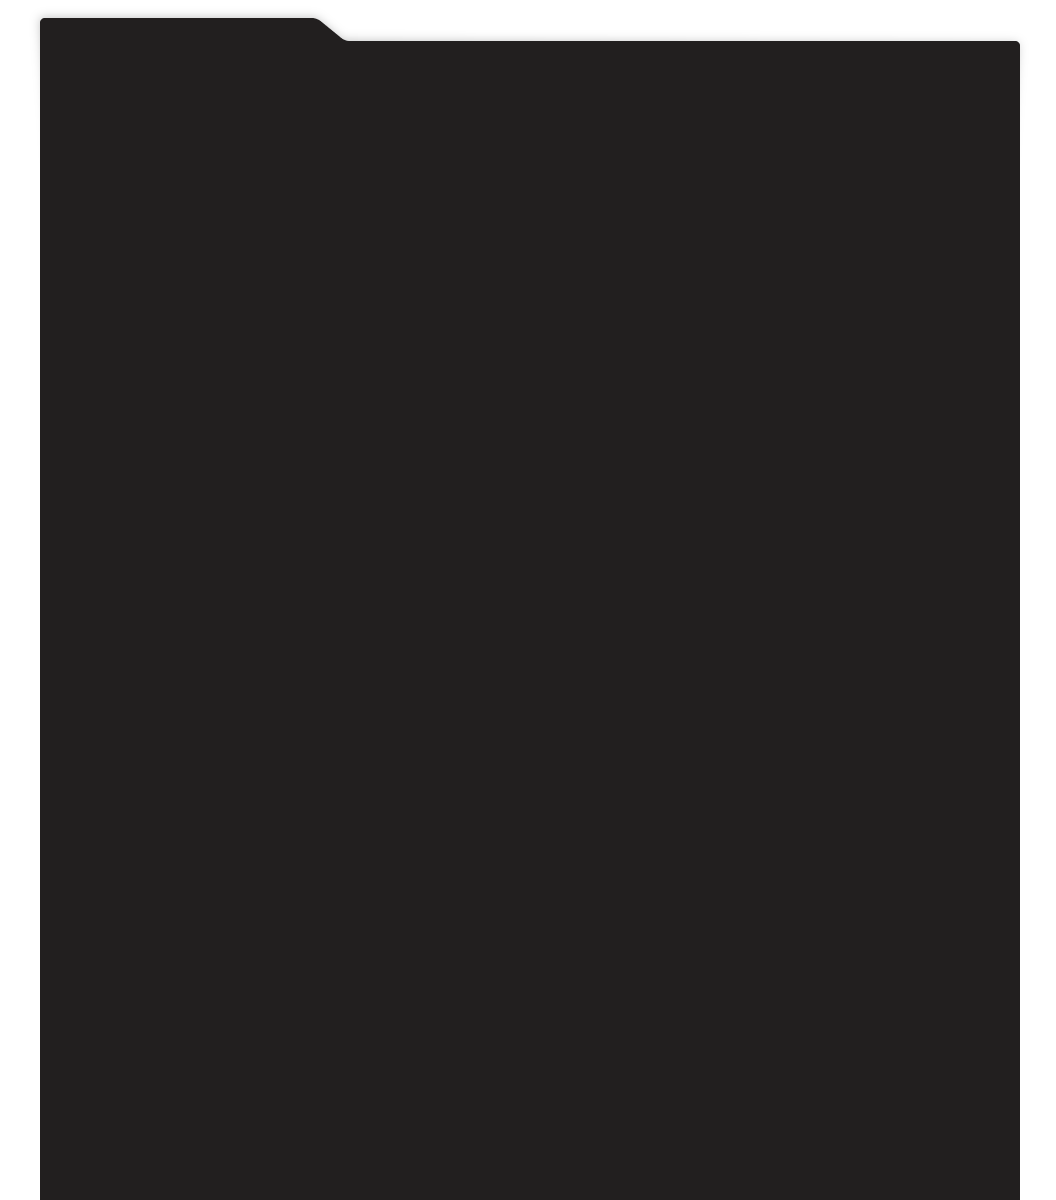
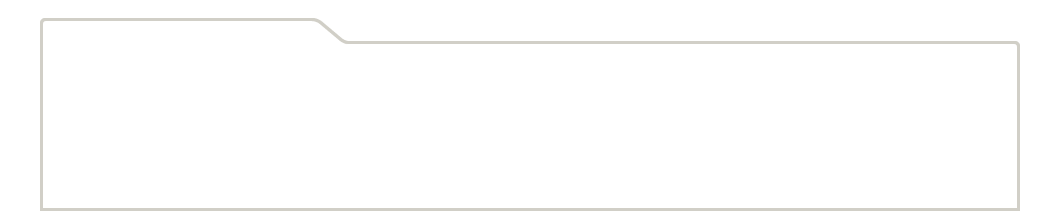
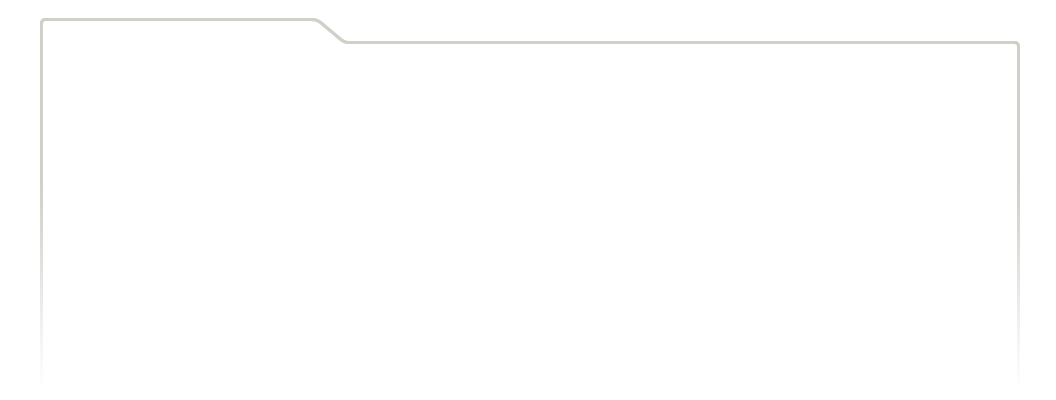
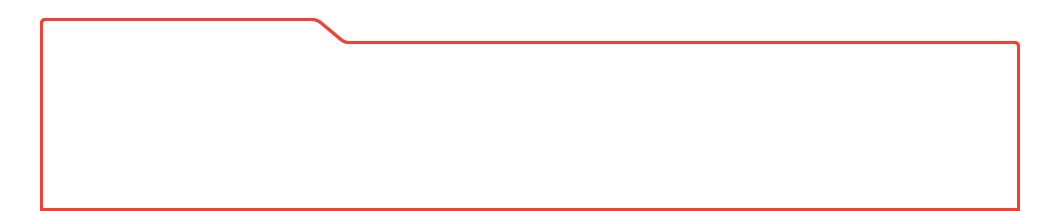
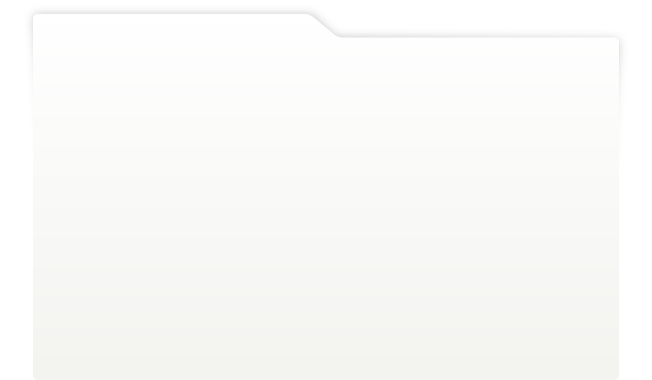
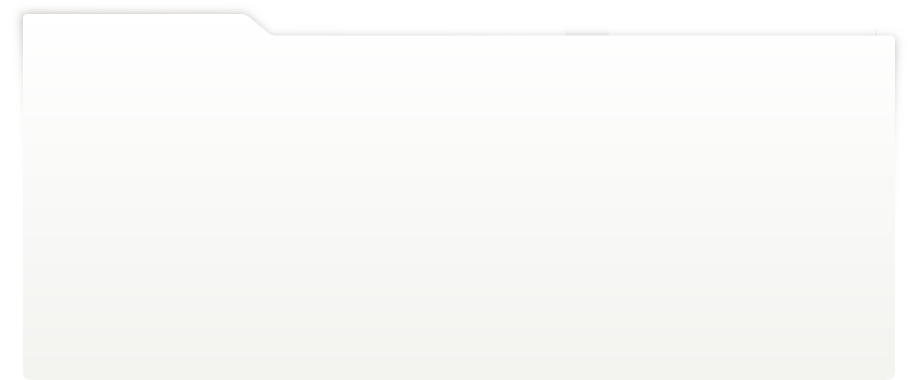
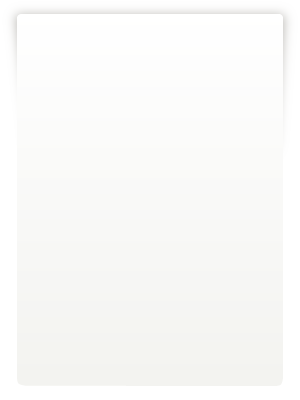
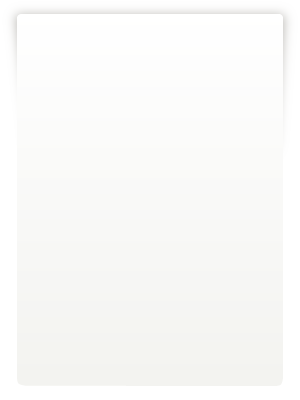
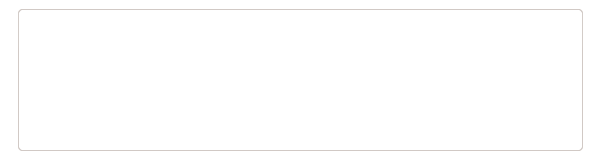
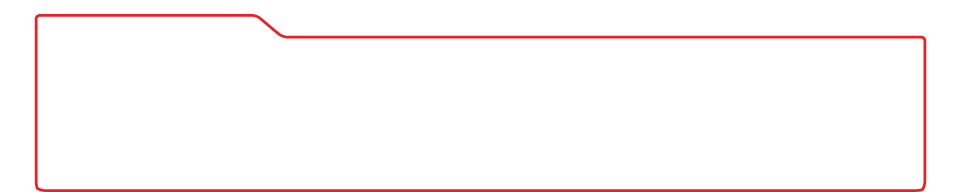
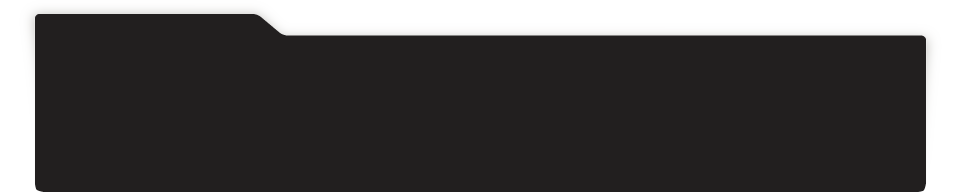
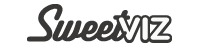
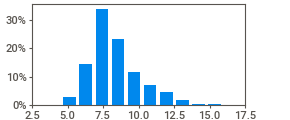
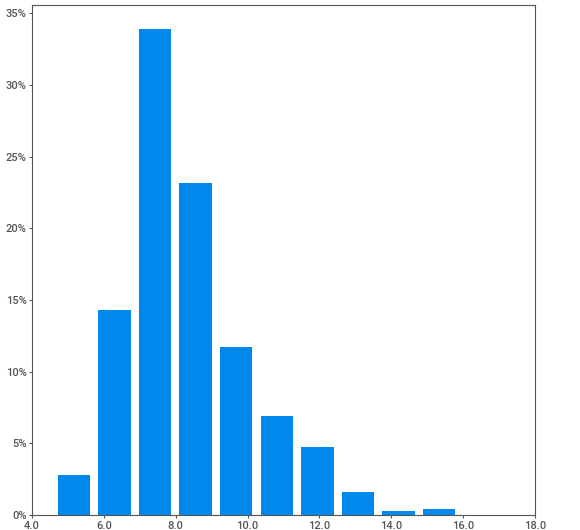
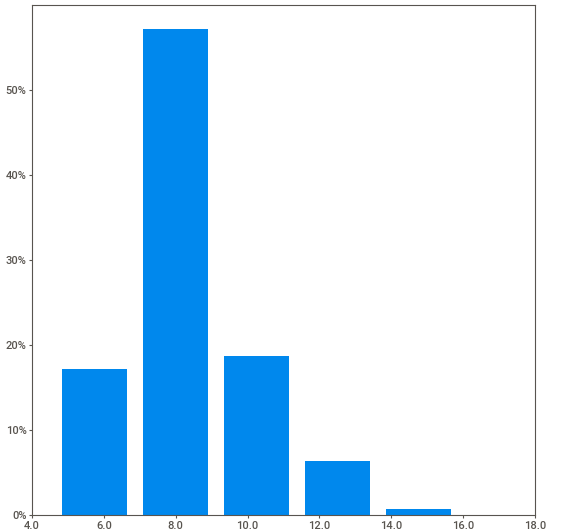
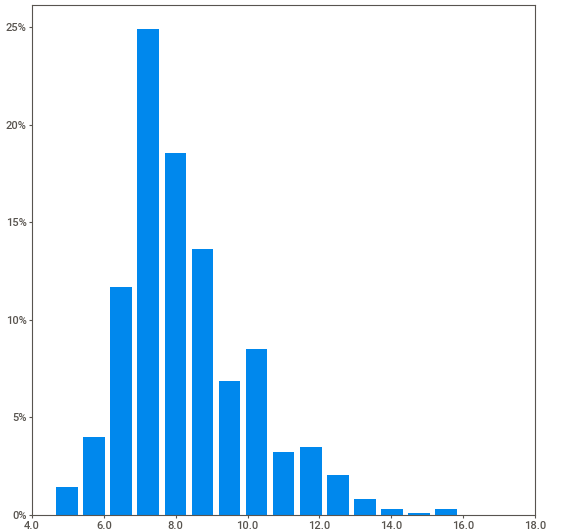
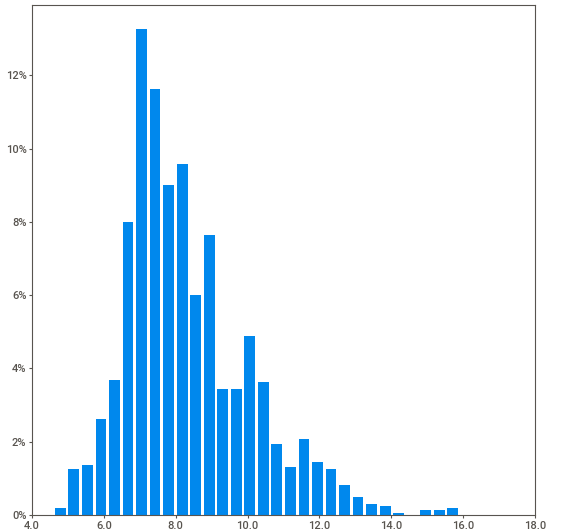
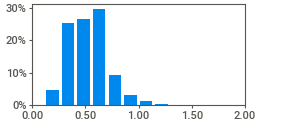
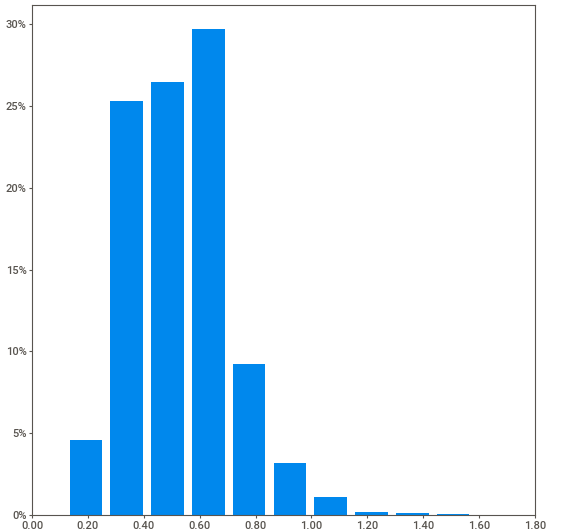
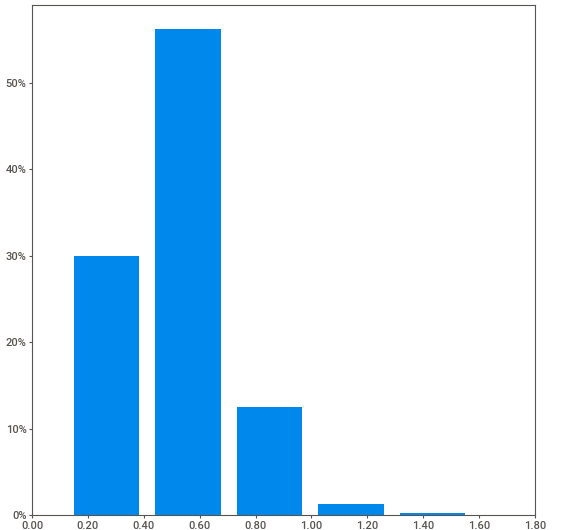
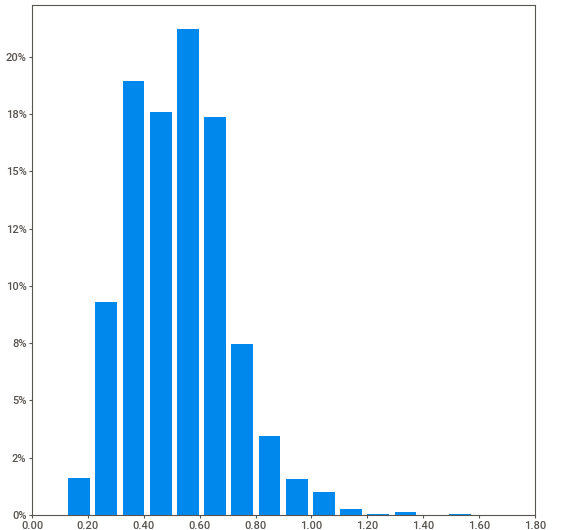
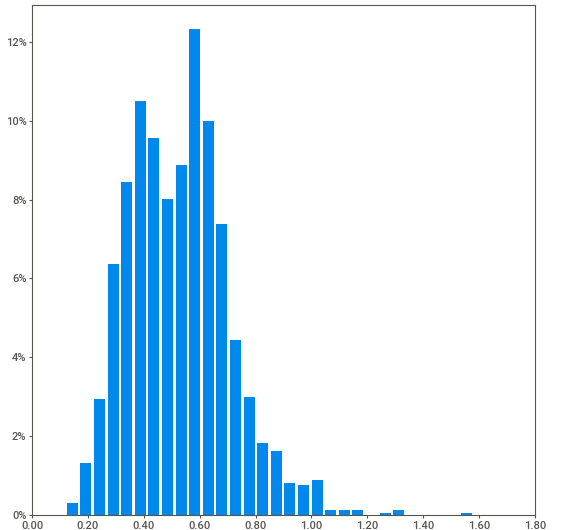
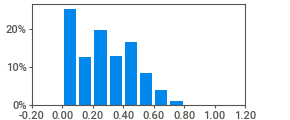
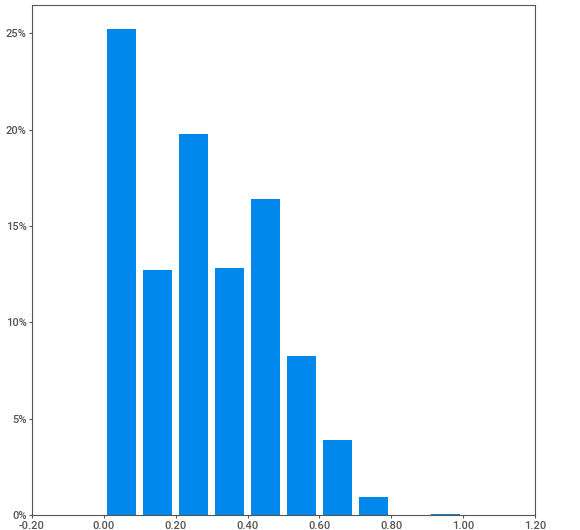
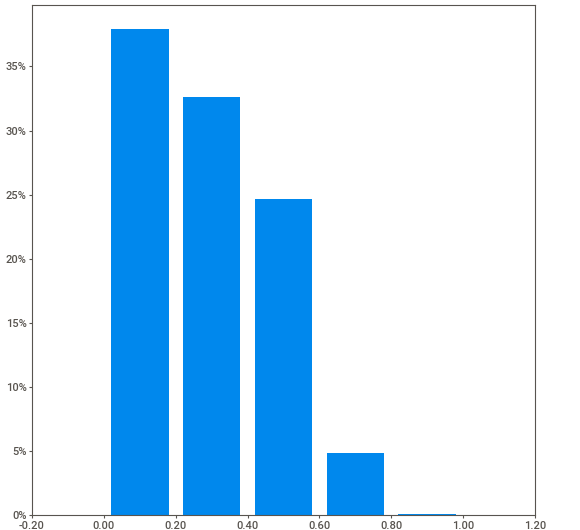
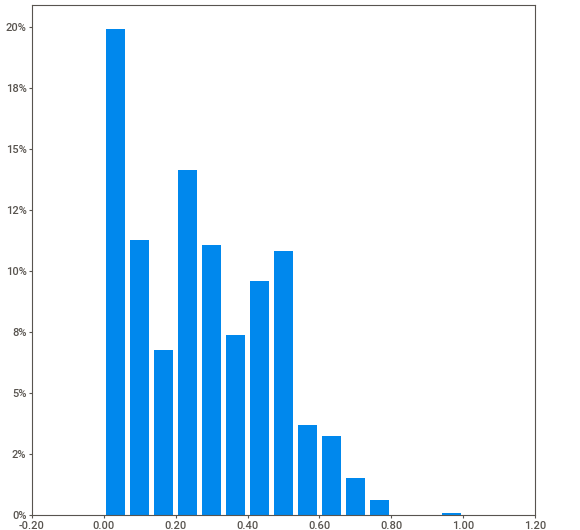
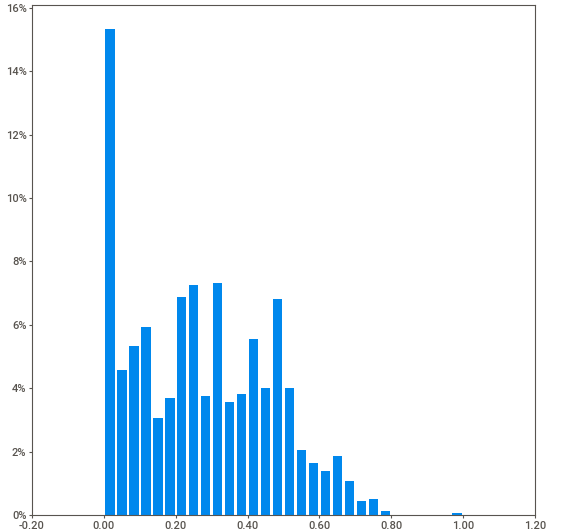
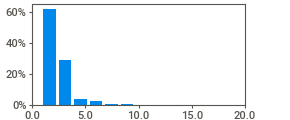
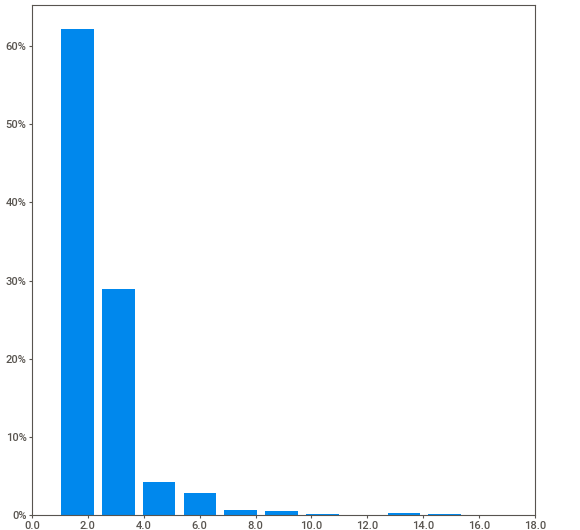
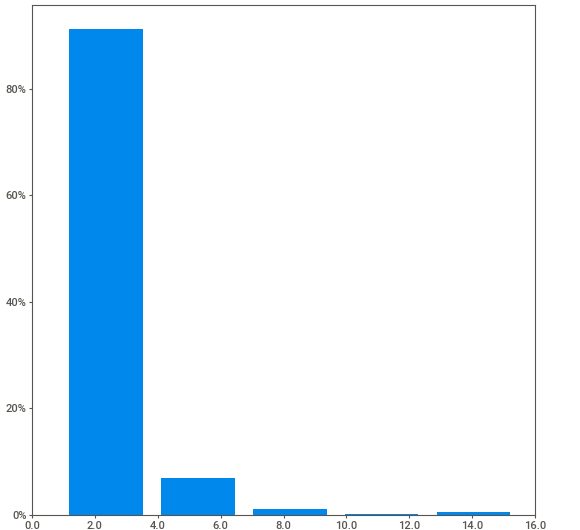
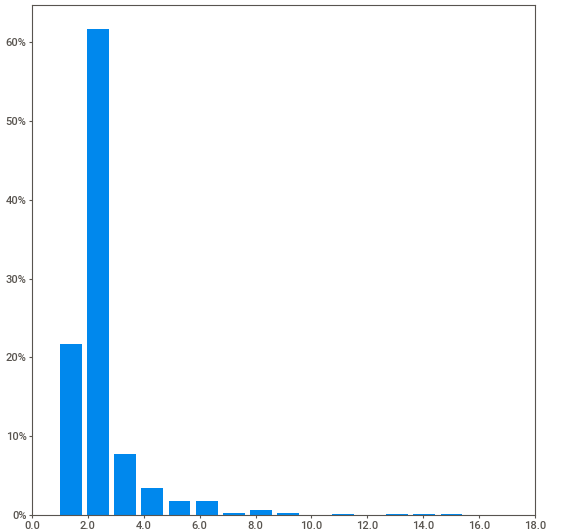
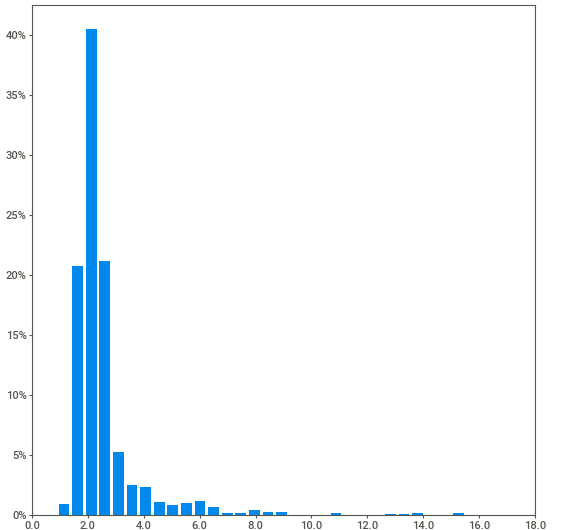
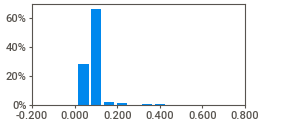
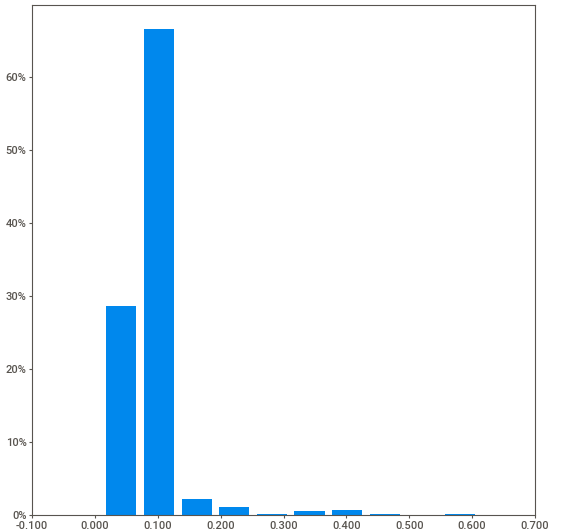
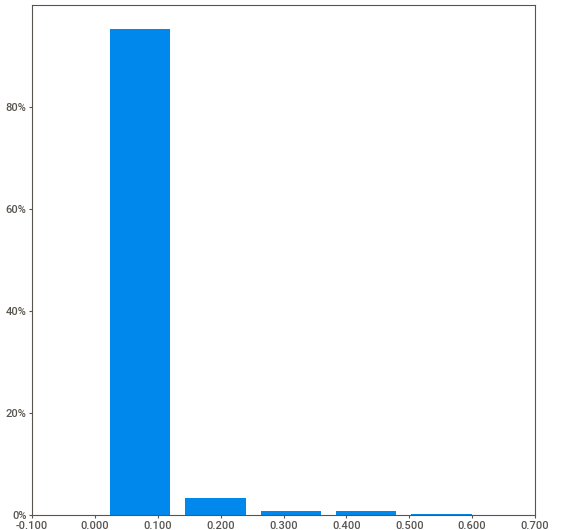
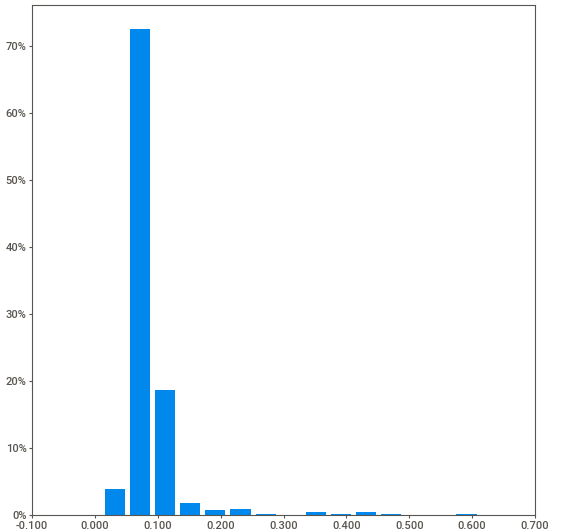
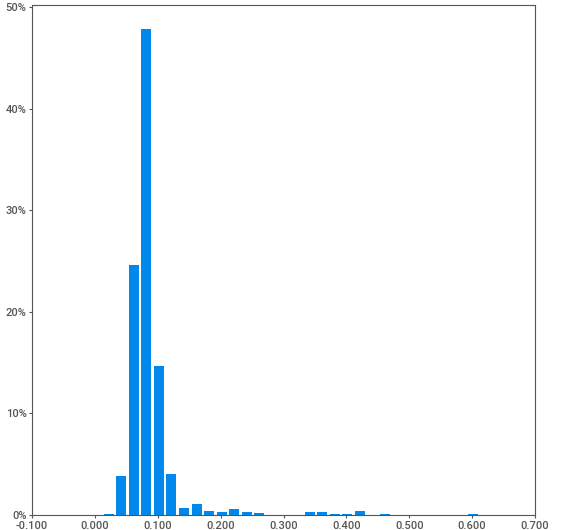
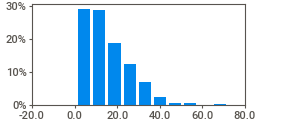
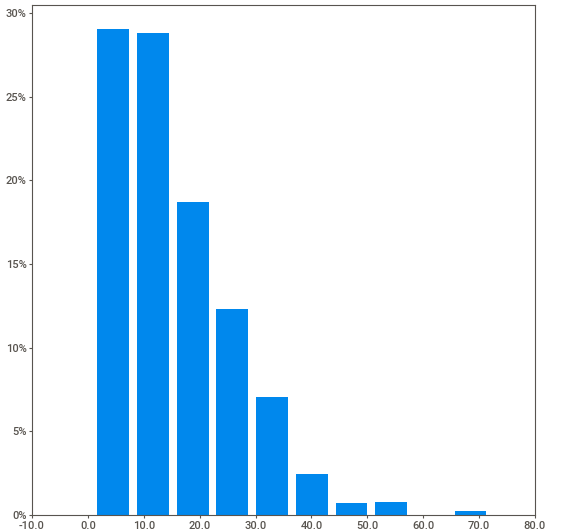
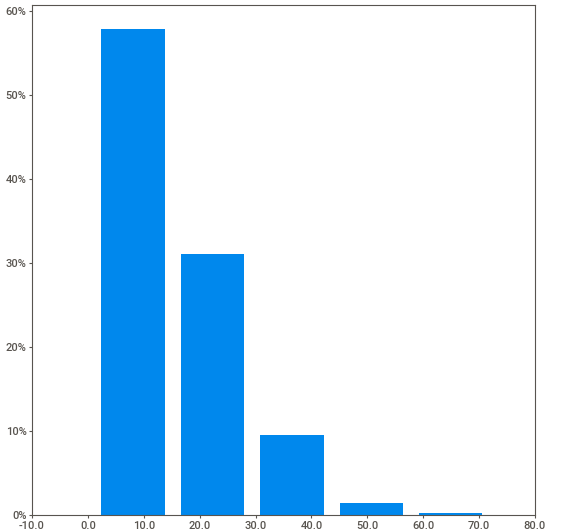
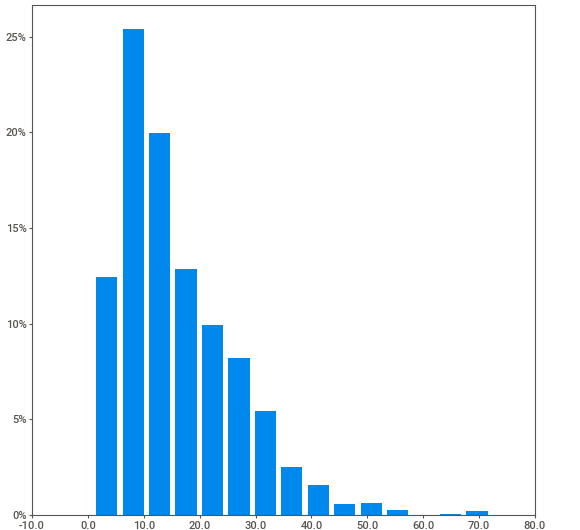
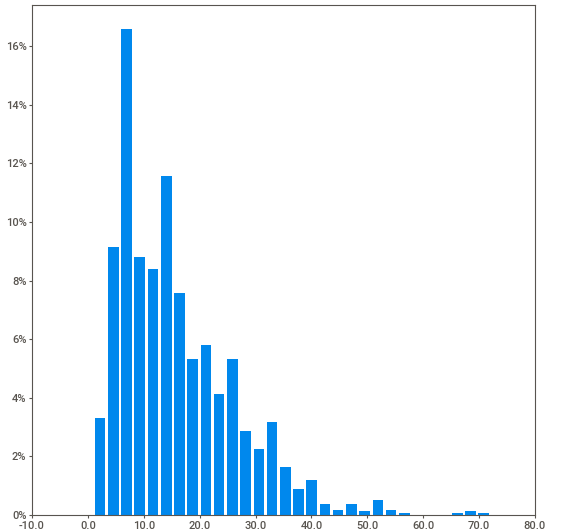
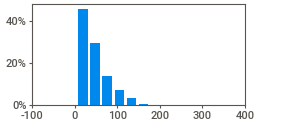
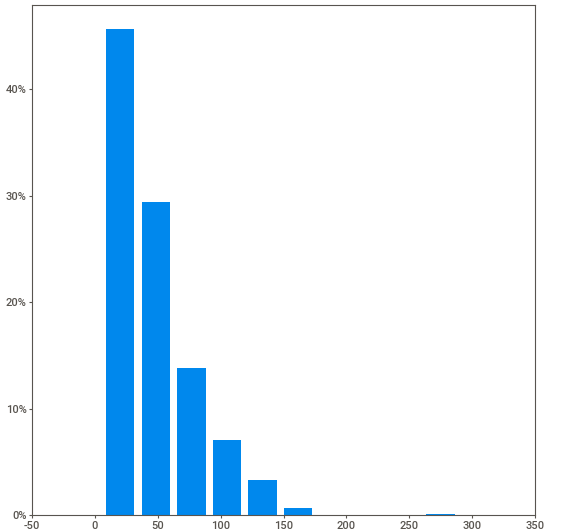
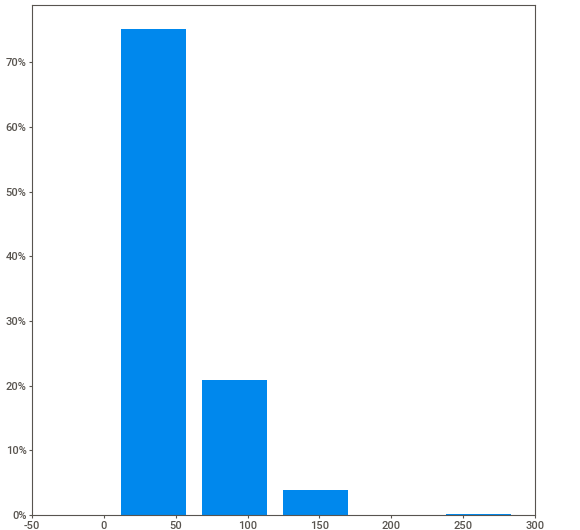
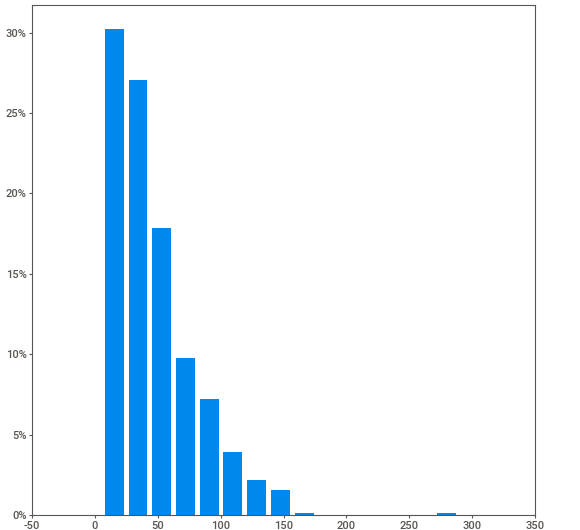
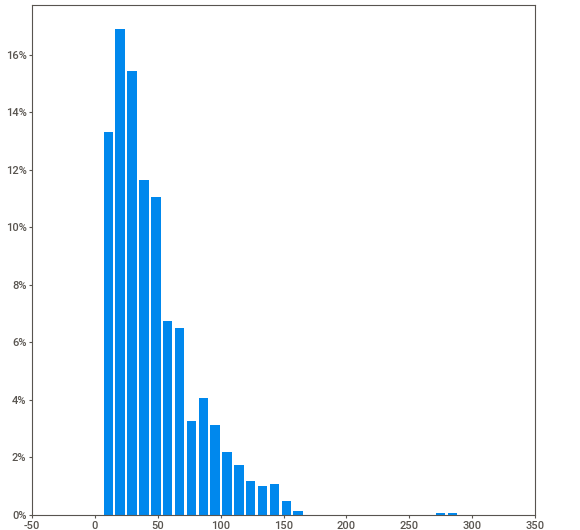
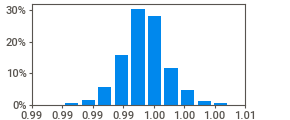
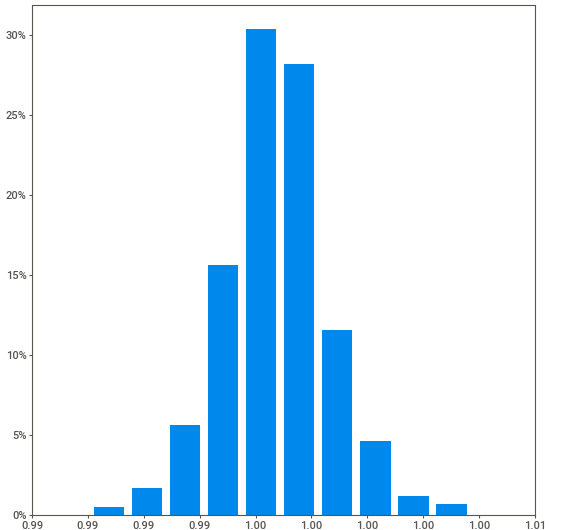
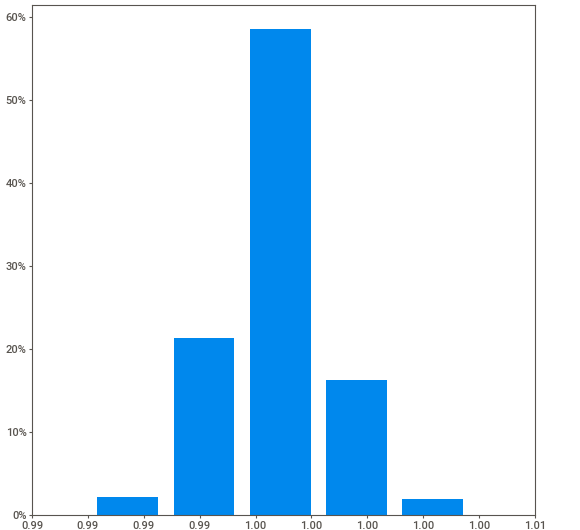
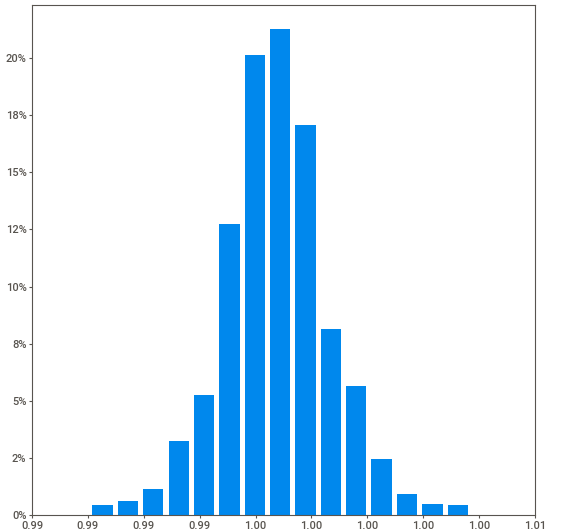
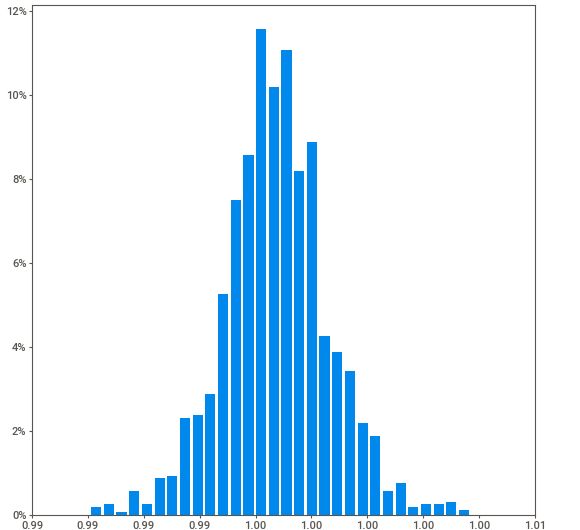
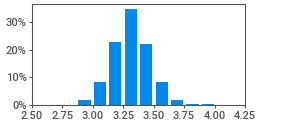
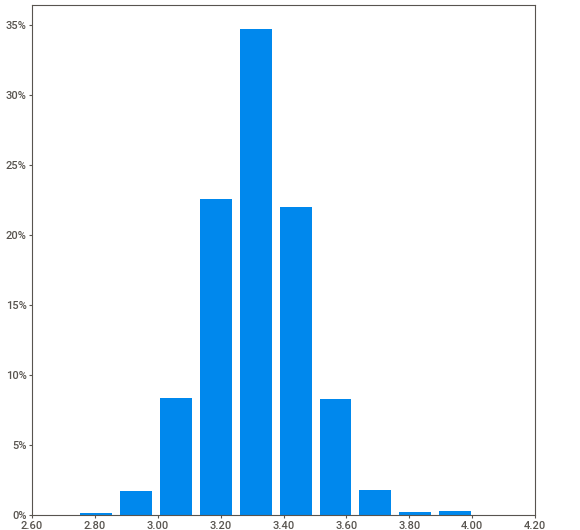
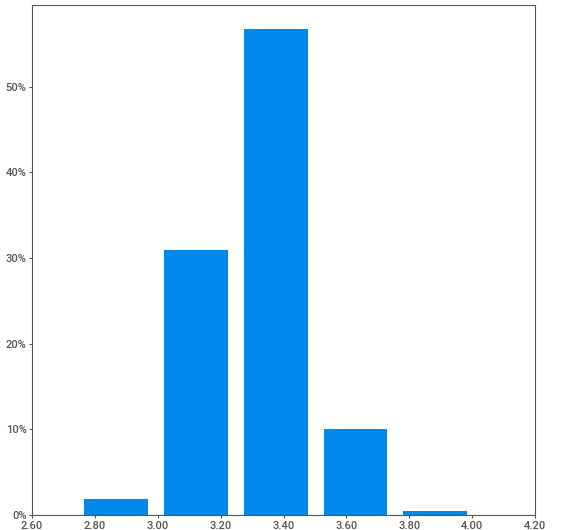
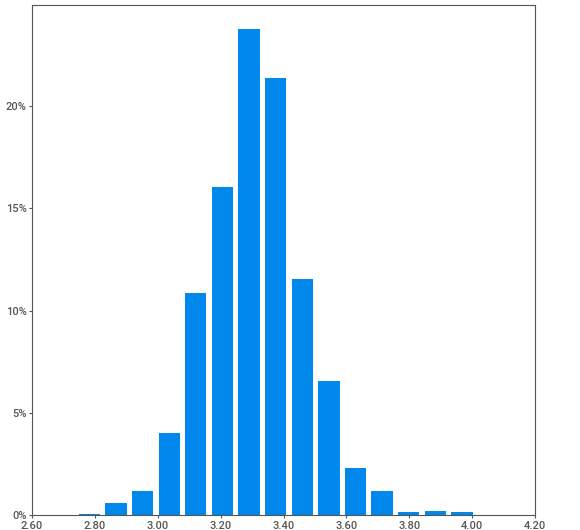
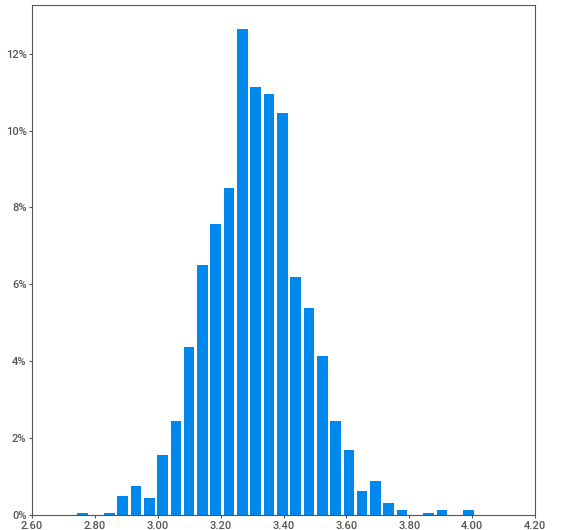
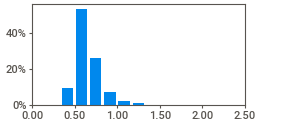
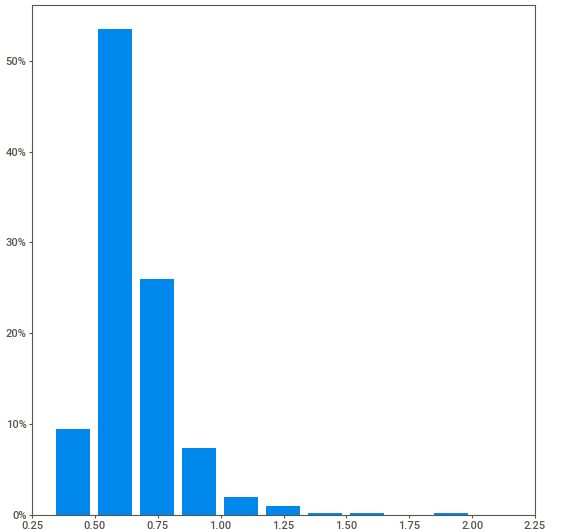
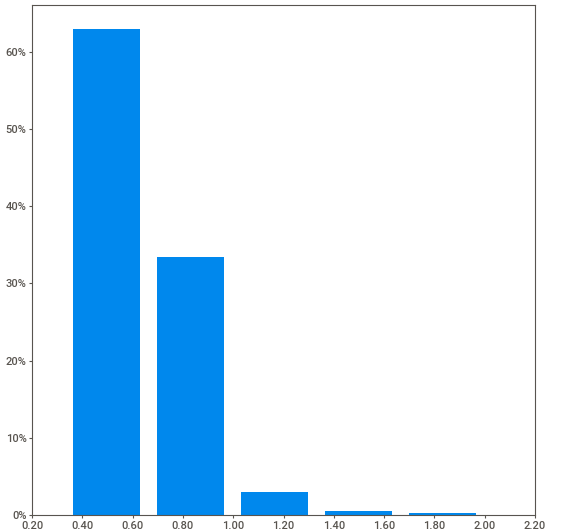
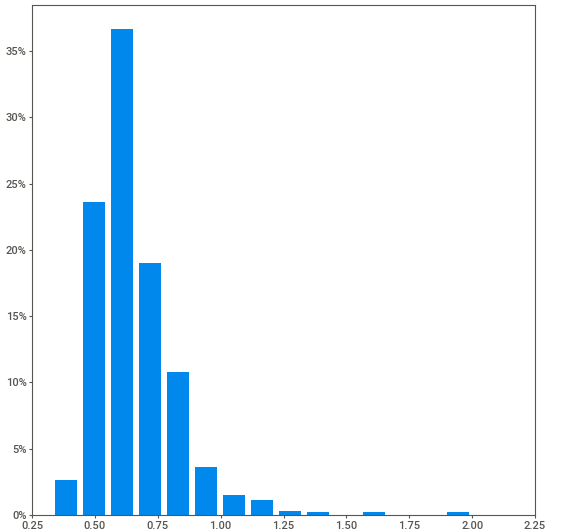
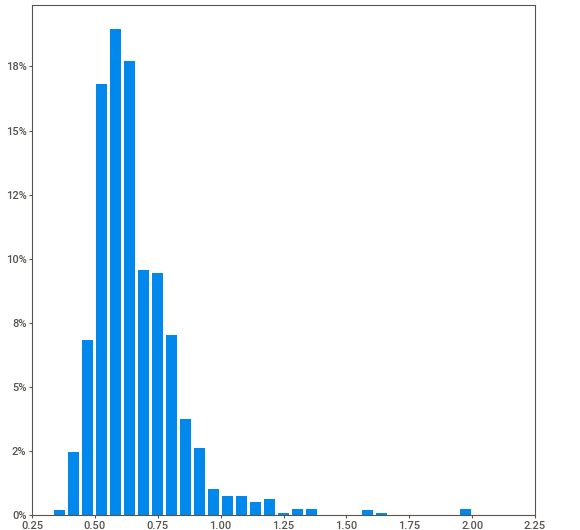
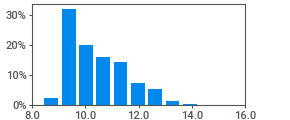
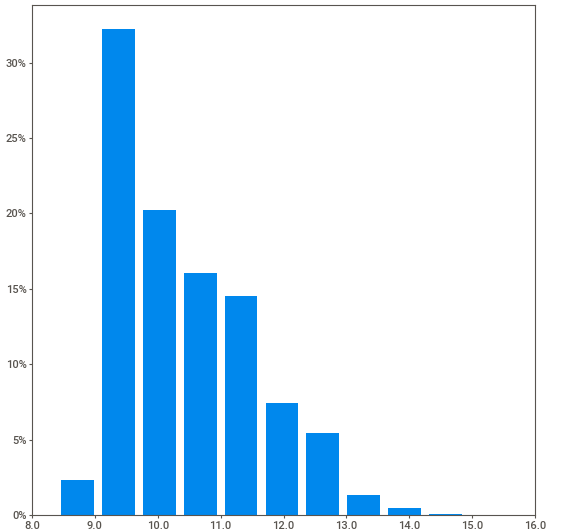
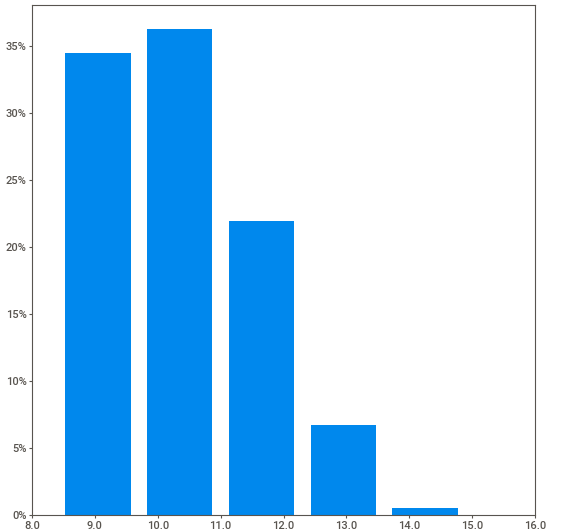
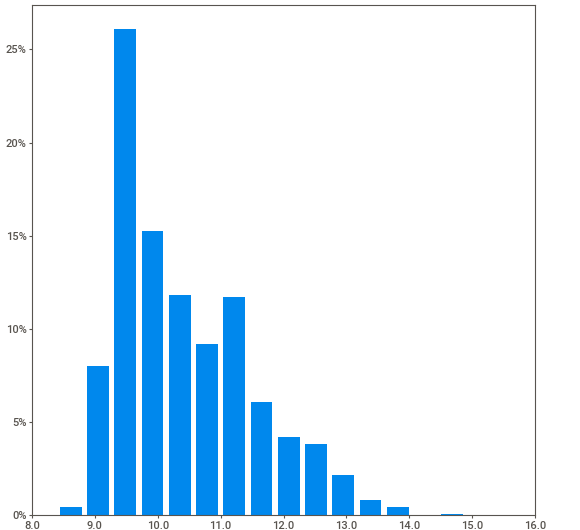
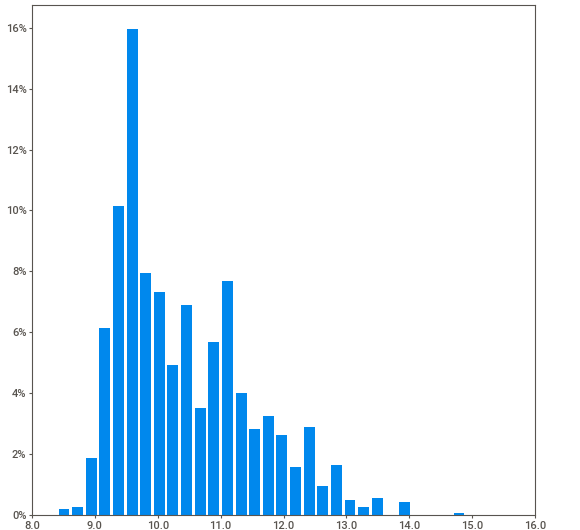
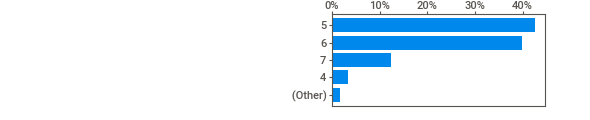
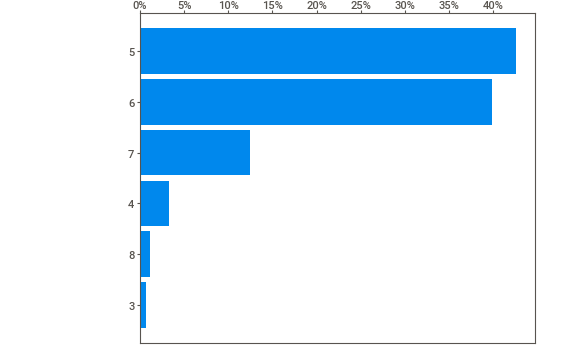
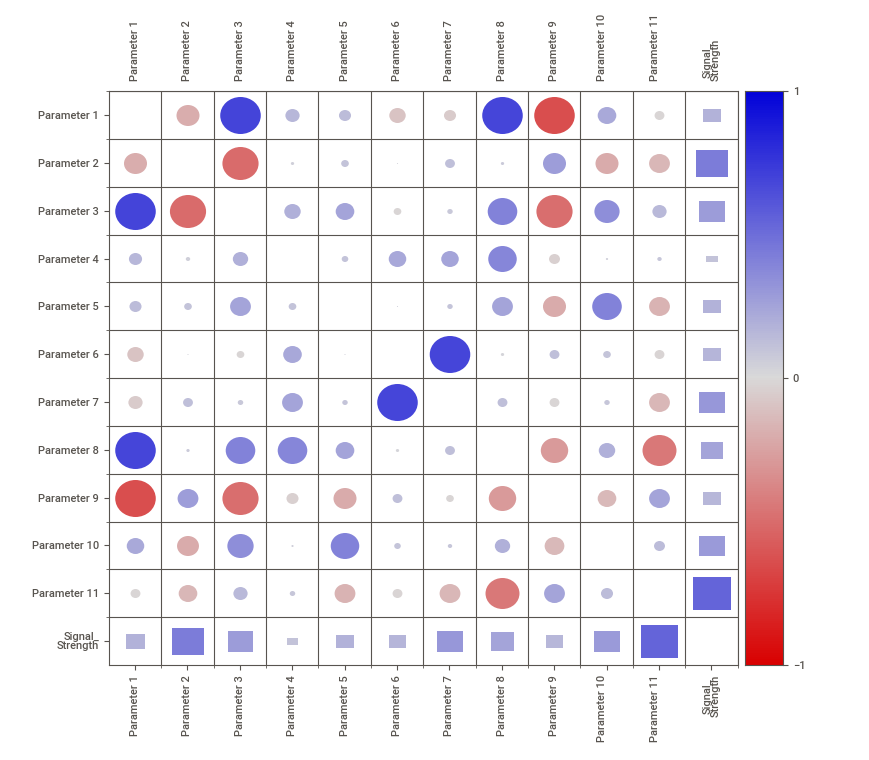
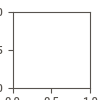

In [13]:
uni_report.show_notebook()

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Parameter 1, 8, 9, 10 and 11 seem to have fairly normal distributions. Others do not seem to follow any distributions</span></p>

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Bi-Variate Analysis
</span></p>


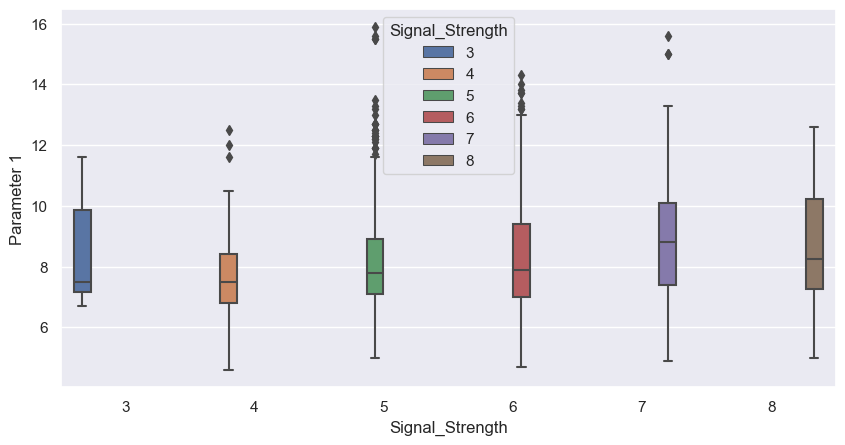

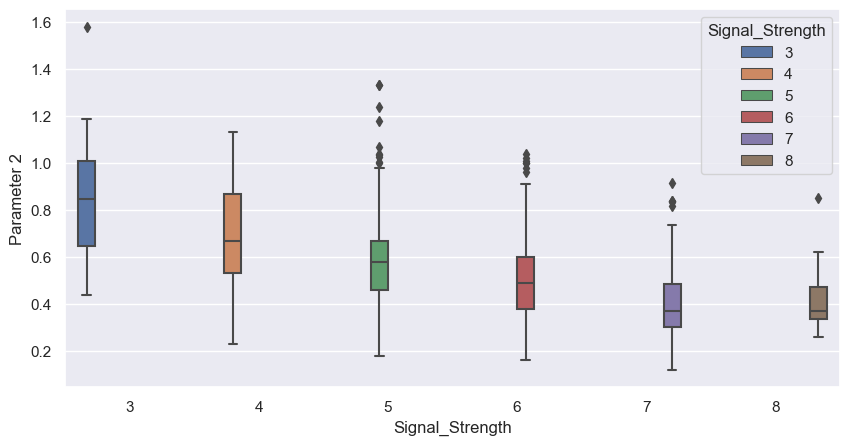

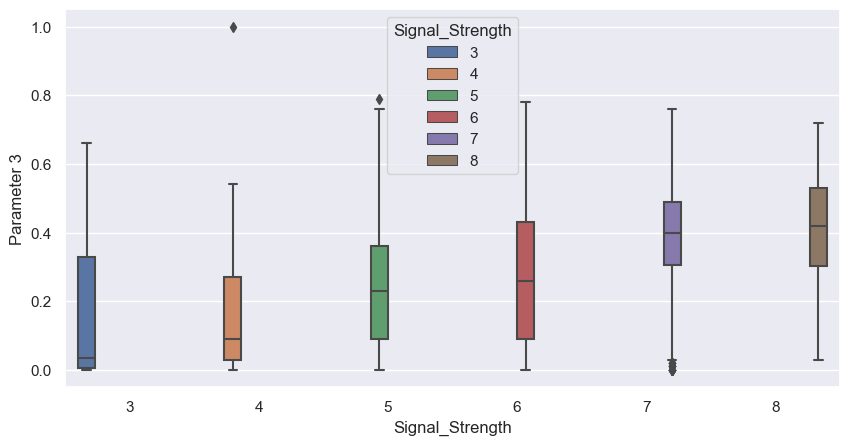

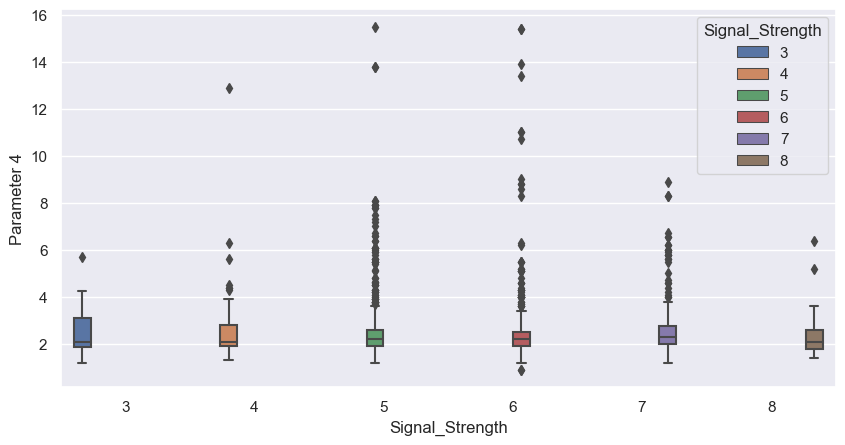

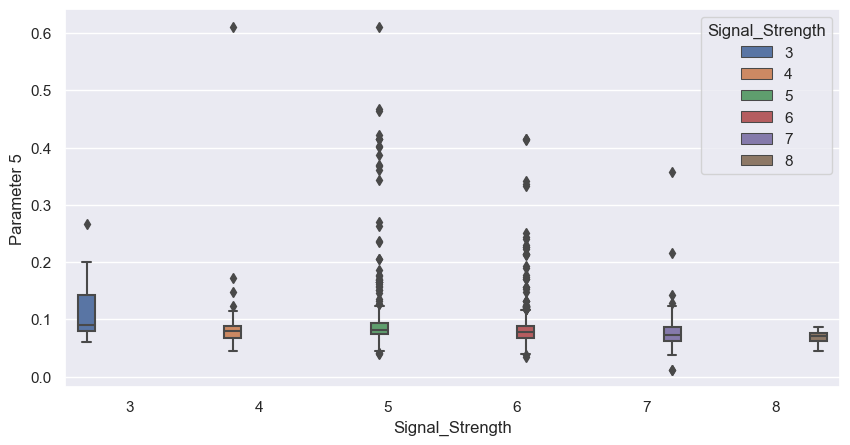

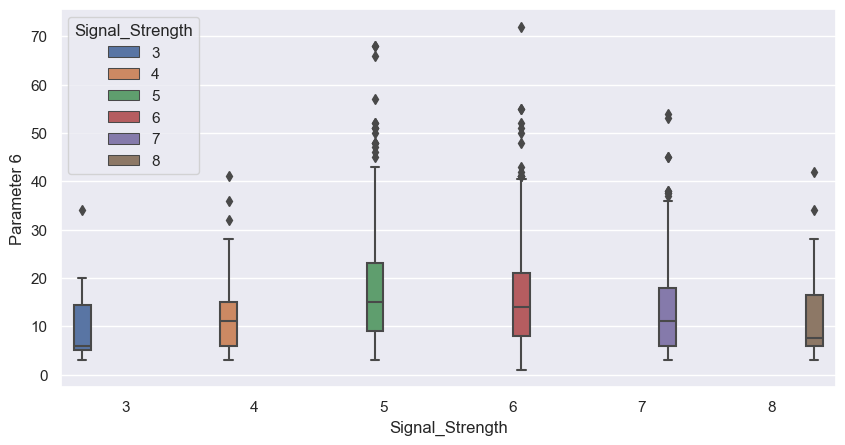

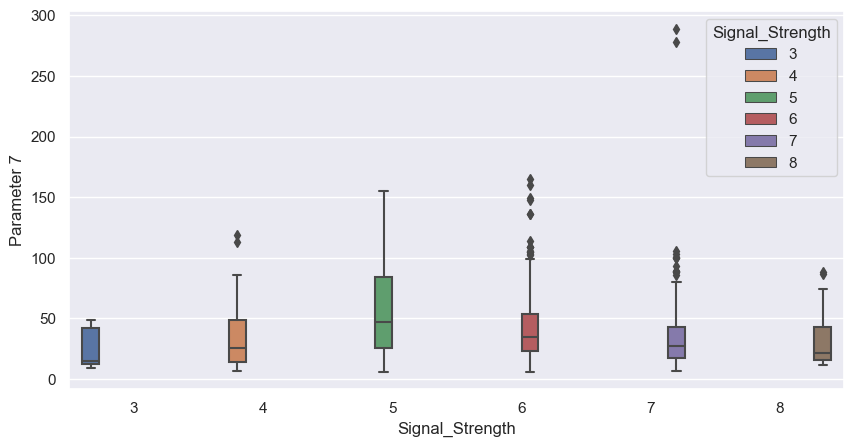

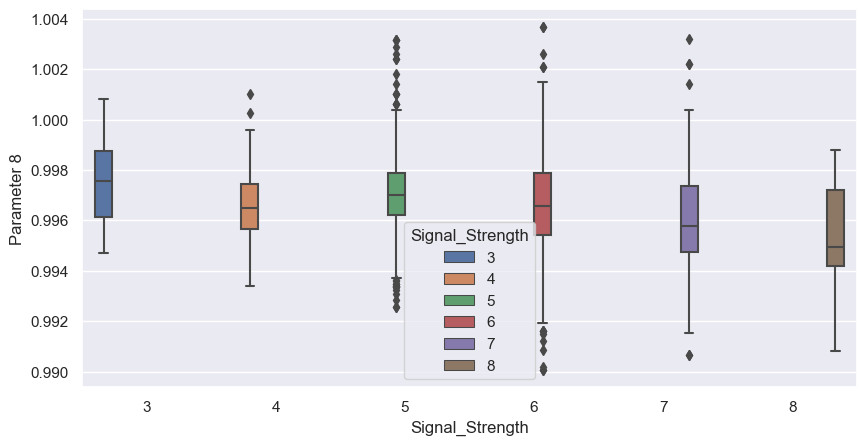

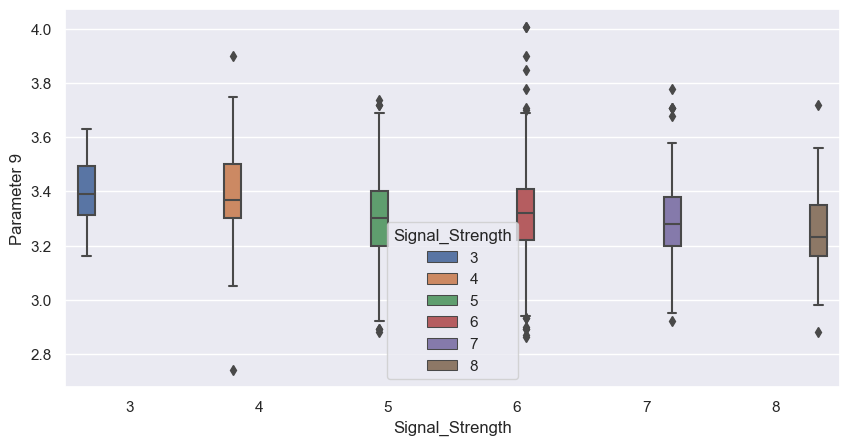

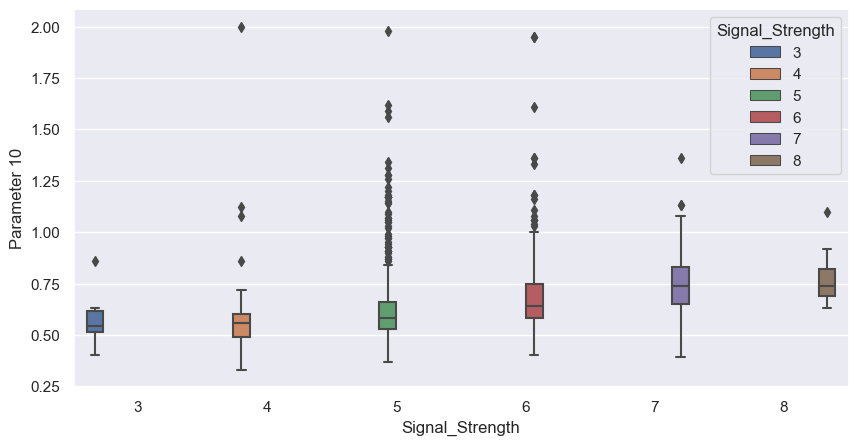

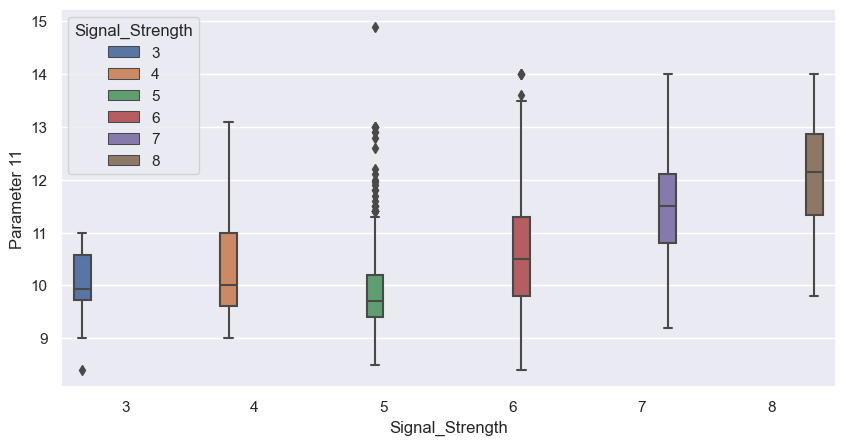

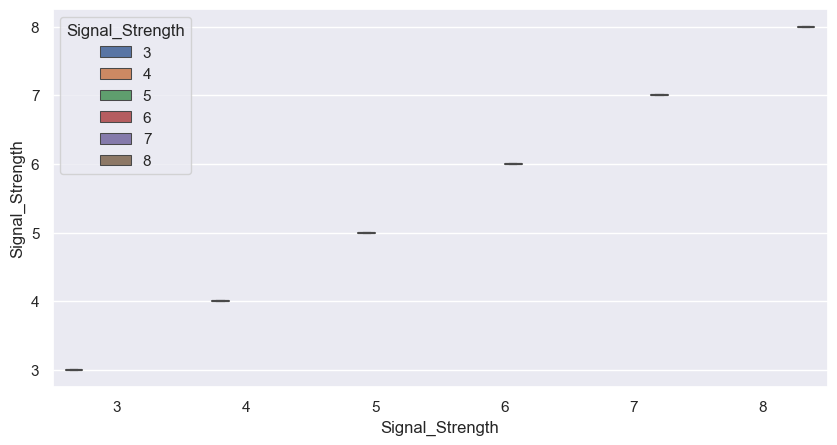

In [14]:
# boxplots
sns.set()
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Signal_Strength',y=column, data = df, hue = 'Signal_Strength')

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Our dataset has outliers as per the boxplots
</span></p>


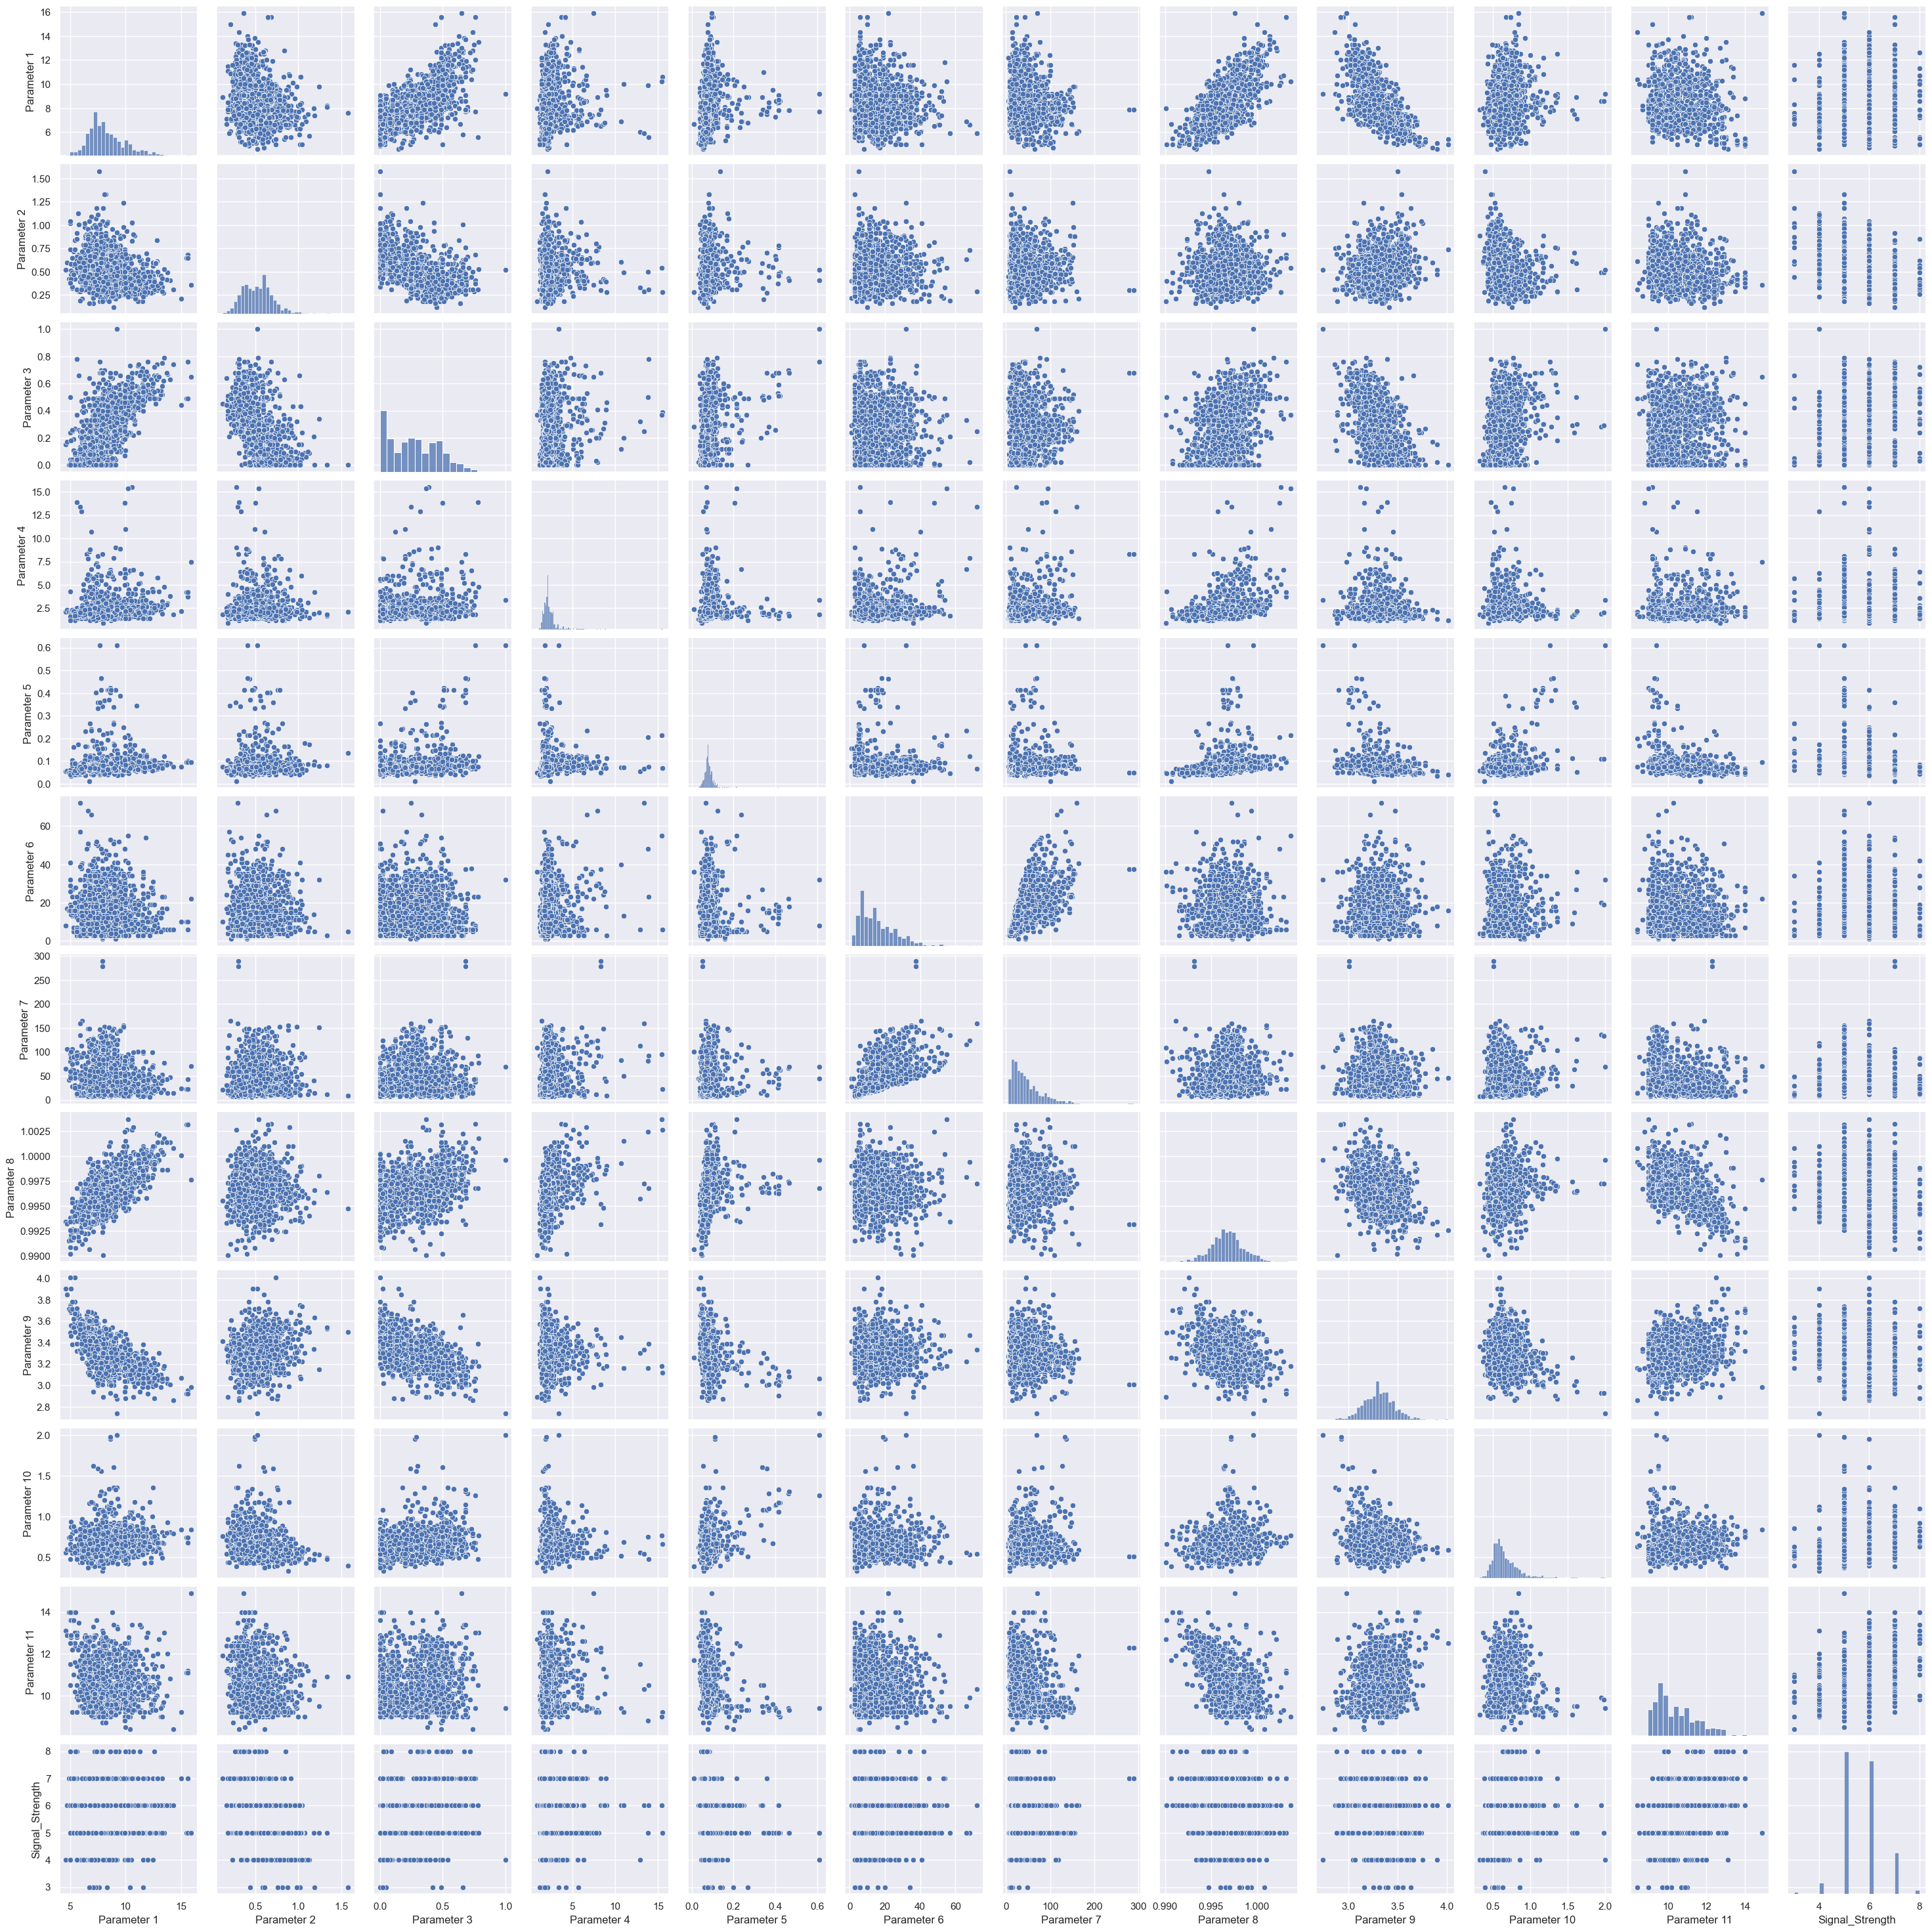

In [15]:
sns.pairplot(df)  # multivariate analysis

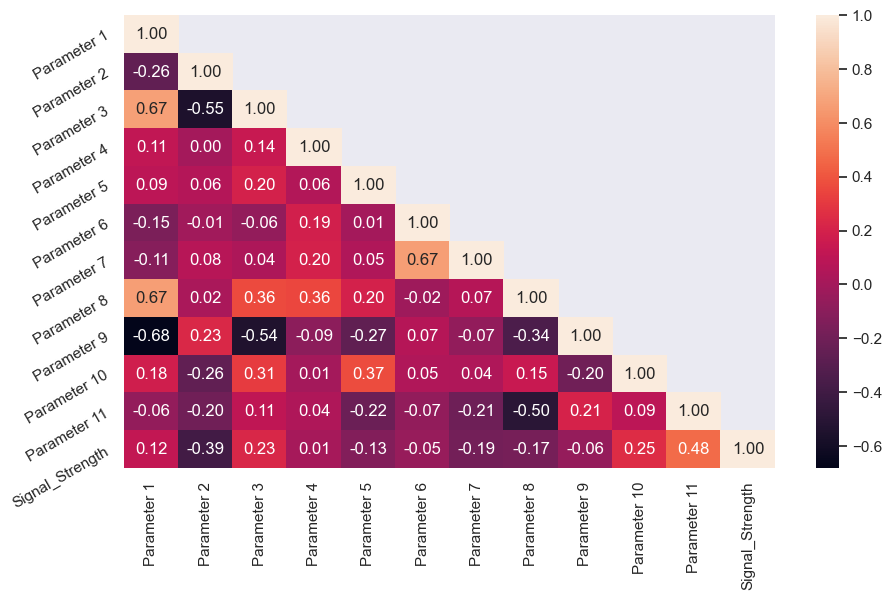

In [16]:
# Correlation with heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10.5, 6))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f', cmap=sns.color_palette("rocket", as_cmap = True))
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">From the correlations: 
    <li>we can see that parameter 1 and parameter 9 have a high correlation of -0.68
    <li>parameter 2 and parameter 3 have a correlation of -0.55
<li>parameter 3 and parameter 9 have a correlation of -0.54

<li>Parameters 4, 6 and 9 have almost negligible correlation with Signal_Strength<br>Hence, These parameters could be considered as noise and dropped during modeling</span></p>

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Train a vanilla random forest model to get feature importances: </span></p>

In [17]:
# Calucate feature importances

def plot_feature_importance(importance, names, model_type):
    """"Create arrays from feature importance and feature names"""
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score

In [19]:
y = df.Signal_Strength
X = df.drop('Signal_Strength', axis=1)

In [20]:
from sklearn.model_selection import train_test_split
seed = 77 # for reproducibility purposes

# 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=seed)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [21]:
# hyper paramter tuning
rf = RandomForestClassifier()
parameters = {'max_features': ['auto', 'sqrt'],
              'n_estimators' : [100, 500, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000],
              'max_depth' : [5, 20, 45, 55, 60, 70, 100],
              'bootstrap': [True, False]}
rf_rand = RandomizedSearchCV(rf, parameters, cv=10, verbose=5, n_jobs=-1)

In [22]:
rf_rand.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 20, 45, 55, 60, 70,
                                                      100],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 500, 1000, 1500,
                                                         2000, 2500, 3000, 4000,
                                                         5000, 6000]},
                   verbose=5)

In [23]:
rf_rand.best_params_

{'n_estimators': 1500,
 'max_features': 'auto',
 'max_depth': 55,
 'bootstrap': True}

In [24]:
rf_pred = rf_rand.predict(X_test)

In [25]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        14
           5       0.71      0.79      0.75       203
           6       0.60      0.71      0.65       187
           7       0.71      0.38      0.50        65
           8       0.00      0.00      0.00         6

    accuracy                           0.66       480
   macro avg       0.34      0.31      0.32       480
weighted avg       0.63      0.66      0.64       480



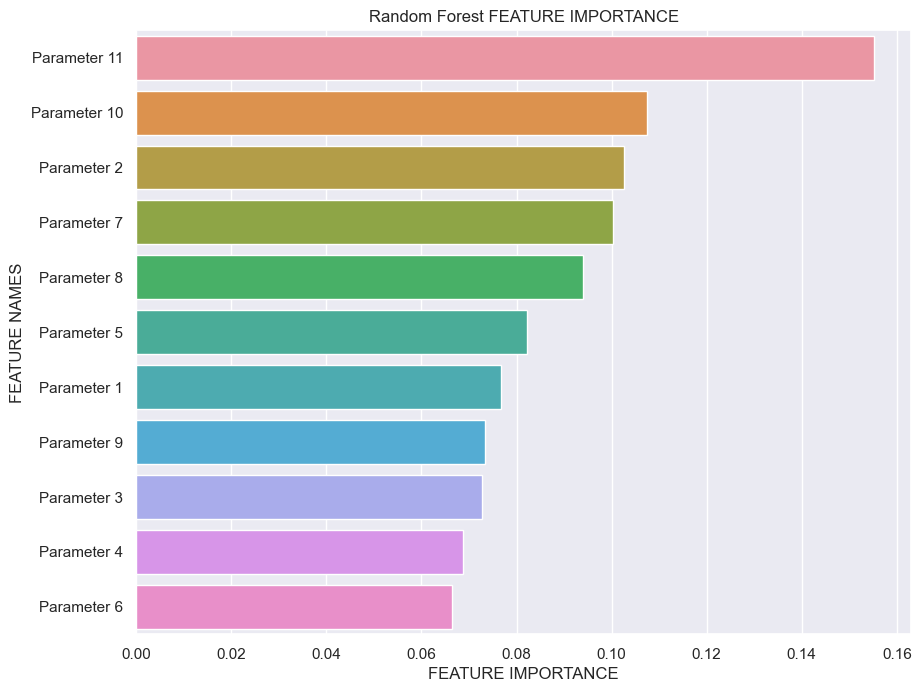

In [26]:
sns.set()
plot_feature_importance(rf_rand.best_estimator_.feature_importances_, X.columns, 'Random Forest ')

<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Hence, Looking at the correlations between the features and the target and the feature importances found from trainign a plain vanilla random forest model. 
    <li>We remove parameters 1, 9 due to it's high correlation with other parameters and negligible correlation with target variable
    <li>We select Parameters: 11, 10, 2, 7, 8, 5, 3 for modeling.</span></p>

In [27]:
selected_df = df[['Parameter 2', 'Parameter 3', 'Parameter 5',
                  'Parameter 7', 'Parameter 8', 'Parameter 10',
                  'Parameter 11', 'Signal_Strength']]

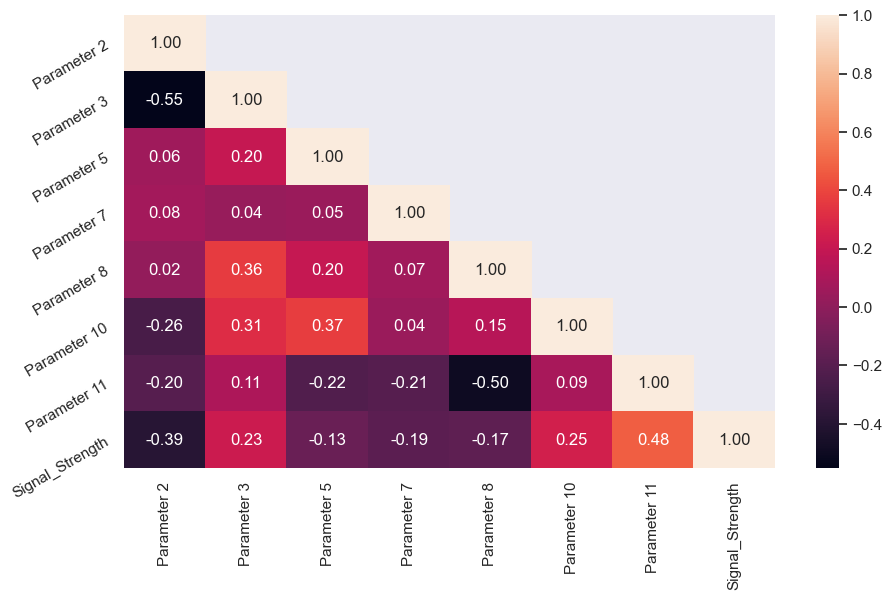

In [28]:
# Correlation with heat map after feature selection

corr = selected_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10.5, 6))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f', cmap=sns.color_palette("rocket", as_cmap = True))
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Hence, Looking at the correlations after feature selection
    <li>The spearman correlations which we created after removing highly correlated features and selecting features using feature importances do not show any highly correlated feature.</span></p>
    

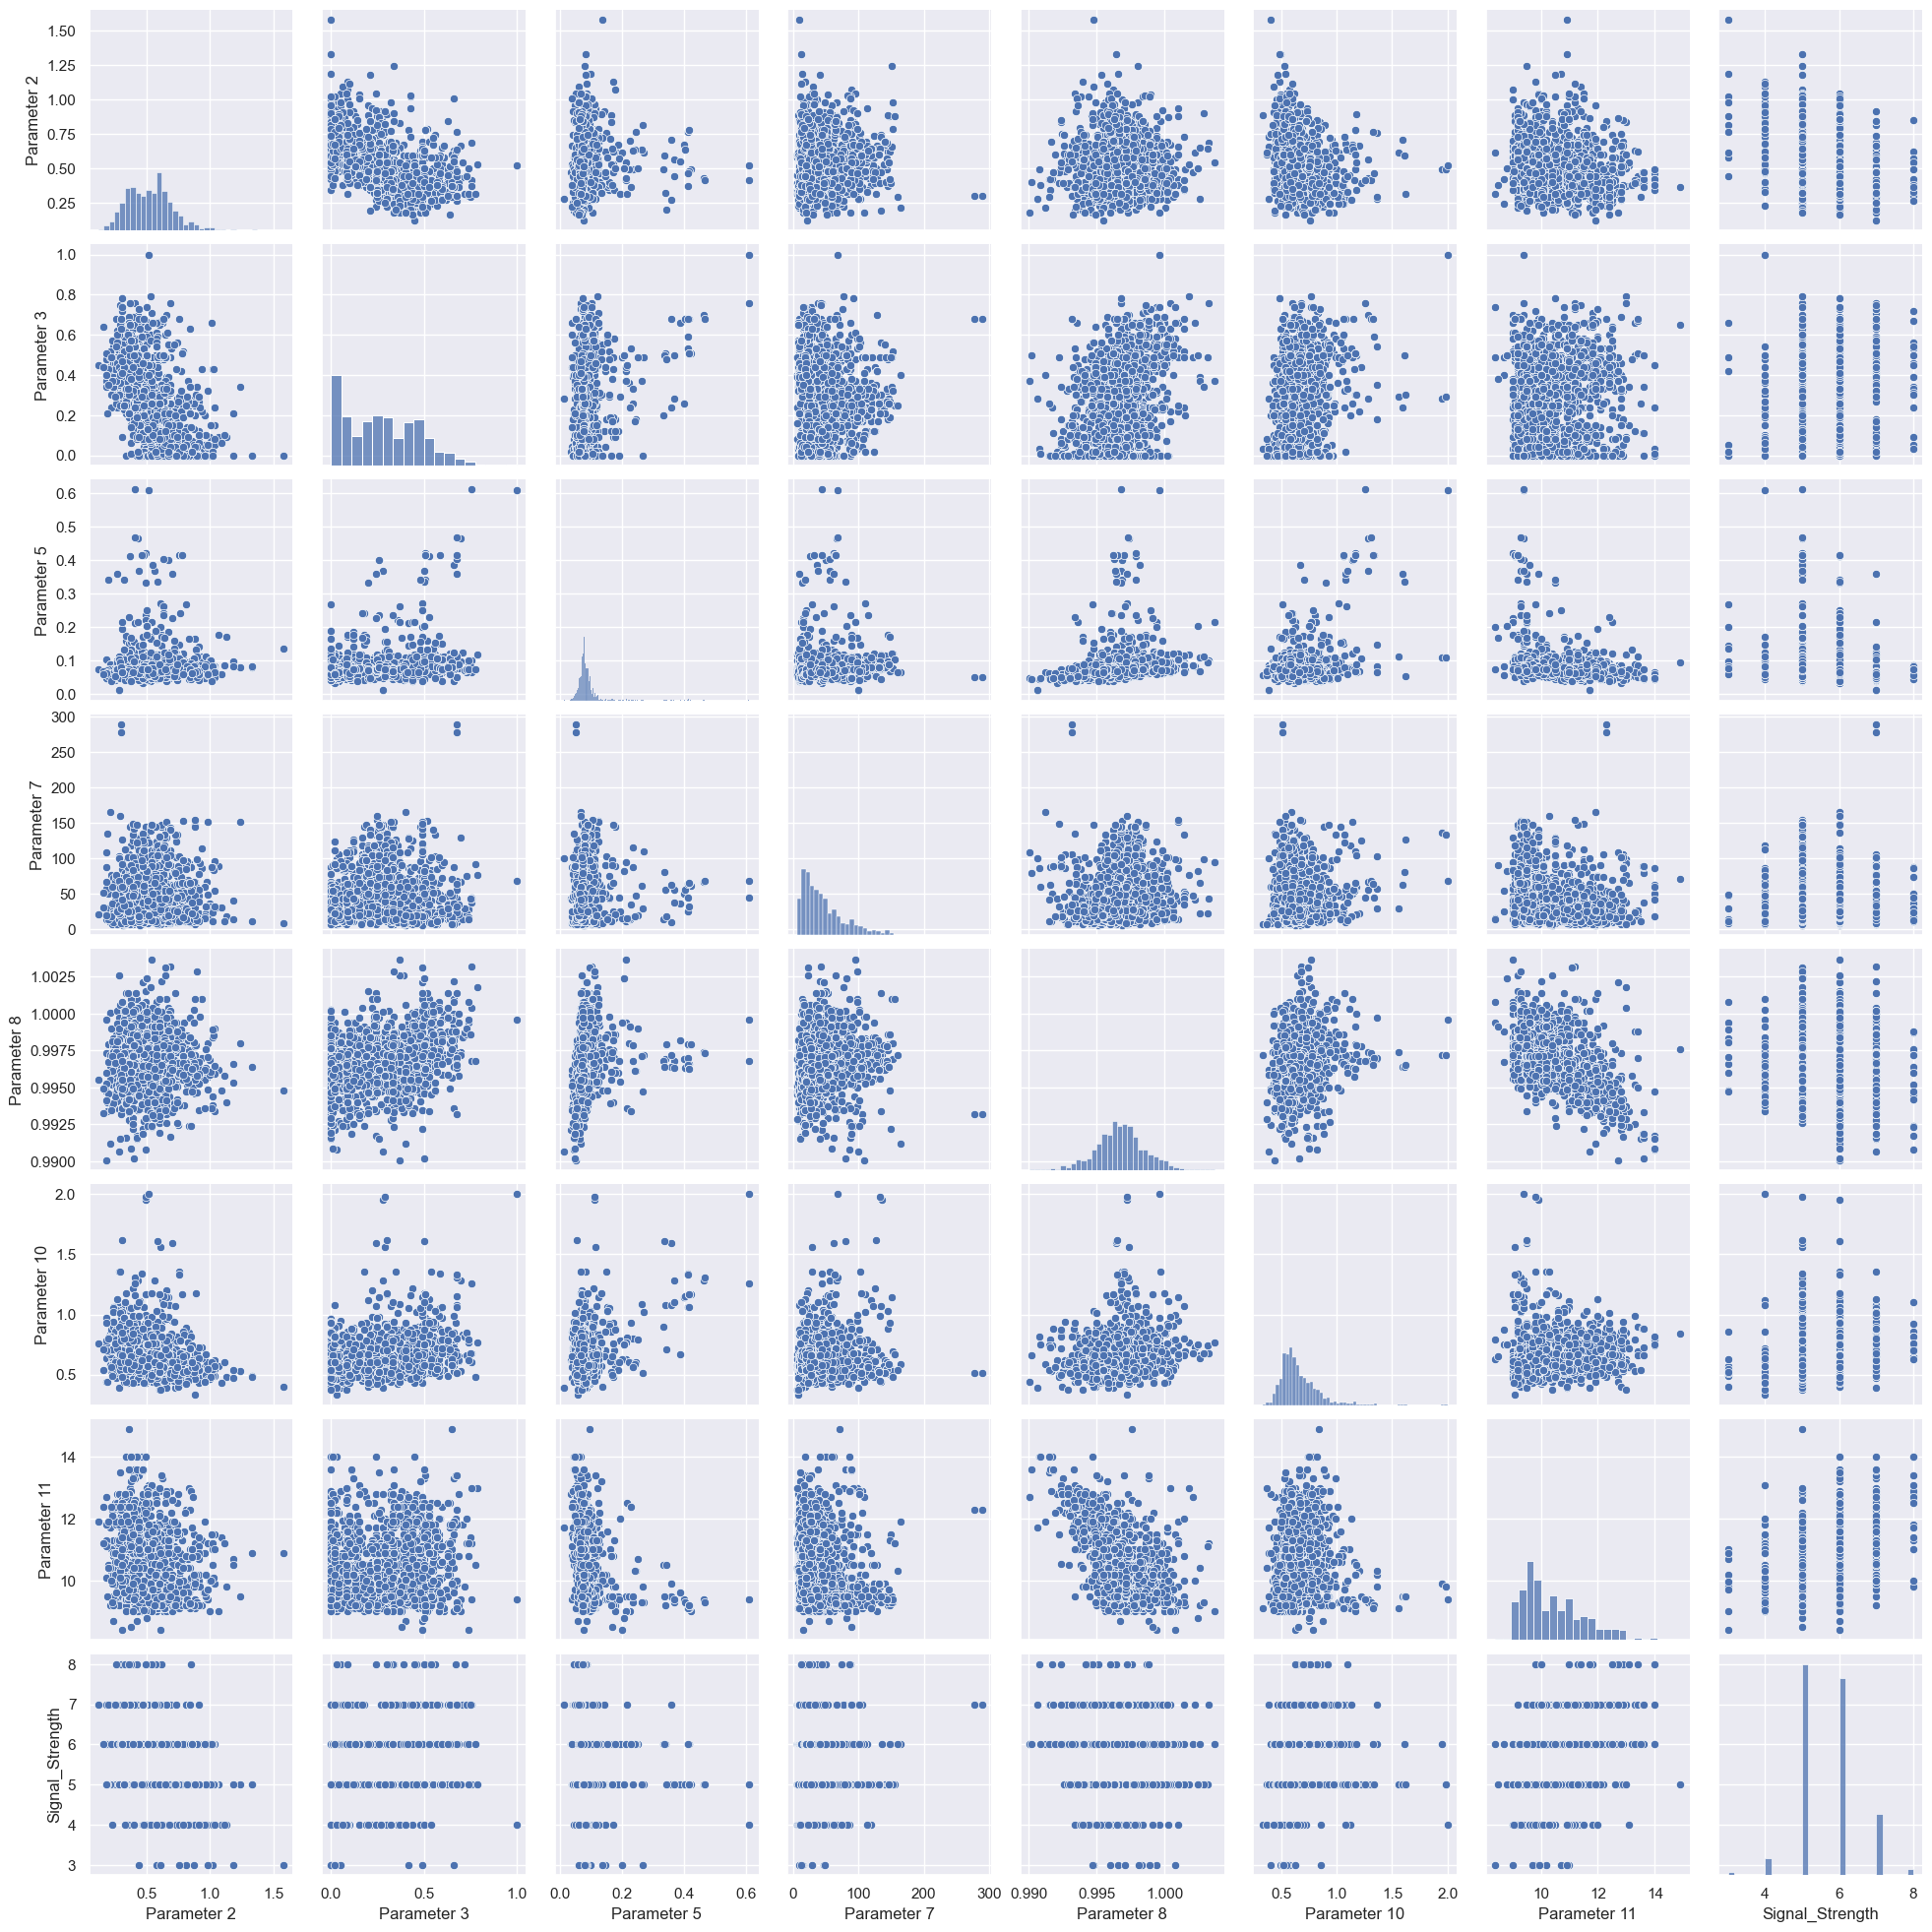

In [29]:
sns.pairplot(selected_df)

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Design, train, tune and test a neural network regressor.</span></strong></li>
</ul>

In [30]:
X = selected_df.drop('Signal_Strength', axis=1)
Y = selected_df['Signal_Strength']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((1119, 7), (480, 7))

In [31]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout

In [32]:
model = Sequential([
    Dense(25, input_dim=7, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.21),
    Dense(25, activation='relu'),
    Dropout(0.21),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                200       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 876
Trainable params: 876
Non-trainable params: 0
_________________________________________________________________


In [33]:
# using mae loss because we have outliers present in our dataset and mse is not robust against outliers
model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

In [34]:
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping

# To simplify the log
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Mae: {l['val_mae']:.5f}", end =" >|> \n" ))

early_stop = EarlyStopping(monitor='val_mae',
                           min_delta=0,
                           patience=10,
                           verbose=1, 
                           restore_best_weights=True)

def plot_learning_curve(hist, metric='mae'):
    sns.set()
    plt.figure(figsize=(5, 4))
    train = hist.history[metric]
    val = hist.history[f'val_{metric}']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation')
    plt.title(f"{metric.capitalize()} vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [35]:
epochs = 300
batch_size = 64
h = model.fit(X_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.2, 
              callbacks = [early_stop, simple_log],
              verbose = False)

 ~| Epoch: 1 | Validation Mae: 15.73217 >|> 
 ~| Epoch: 2 | Validation Mae: 6.40544 >|> 
 ~| Epoch: 3 | Validation Mae: 3.28056 >|> 
 ~| Epoch: 4 | Validation Mae: 3.19513 >|> 
 ~| Epoch: 5 | Validation Mae: 3.61299 >|> 
 ~| Epoch: 6 | Validation Mae: 2.78162 >|> 
 ~| Epoch: 7 | Validation Mae: 2.37062 >|> 
 ~| Epoch: 8 | Validation Mae: 2.19591 >|> 
 ~| Epoch: 9 | Validation Mae: 1.94150 >|> 
 ~| Epoch: 10 | Validation Mae: 1.52547 >|> 
 ~| Epoch: 11 | Validation Mae: 1.31017 >|> 
 ~| Epoch: 12 | Validation Mae: 1.44370 >|> 
 ~| Epoch: 13 | Validation Mae: 0.97502 >|> 
 ~| Epoch: 14 | Validation Mae: 1.66238 >|> 
 ~| Epoch: 15 | Validation Mae: 1.01762 >|> 
 ~| Epoch: 16 | Validation Mae: 1.33382 >|> 
 ~| Epoch: 17 | Validation Mae: 1.95130 >|> 
 ~| Epoch: 18 | Validation Mae: 0.90262 >|> 
 ~| Epoch: 19 | Validation Mae: 2.00645 >|> 
 ~| Epoch: 20 | Validation Mae: 0.91266 >|> 
 ~| Epoch: 21 | Validation Mae: 1.87634 >|> 
 ~| Epoch: 22 | Validation Mae: 1.92159 >|> 
 ~| Epoch: 23 | Va

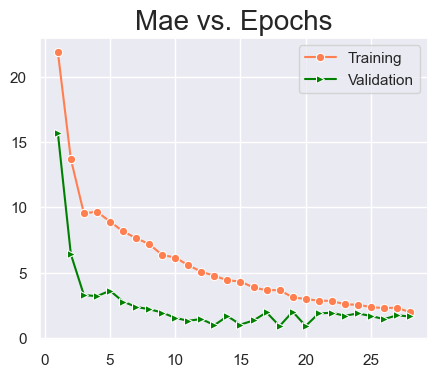

In [36]:
plot_learning_curve(h)

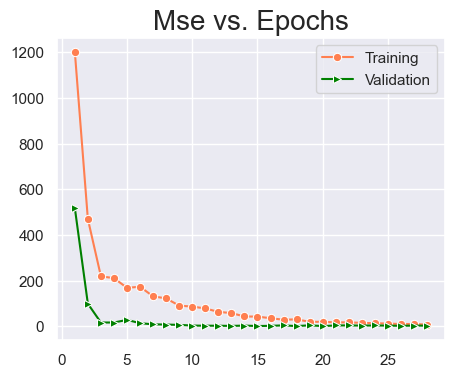

In [37]:
plot_learning_curve(h, metric='mse')

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1.386923222415295

In [40]:
mean_absolute_error(y_test, y_pred)

0.9641708801190059

<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Pickle the model for future use.</span></strong></li>
</ul>

In [41]:
filename = 'Signal_Strength_Regressor'
model.save(f"{filename}.h5")

In [42]:
# some time later...

# load the model from disk
from tensorflow.keras.models import load_model
 
# load model
model = load_model(f"{filename}.h5")
# summarize model.
model.summary()
# Hence, this model can be loaded and re-used anywhere with similar datasets

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                200       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 876
Trainable params: 876
Non-trainable params: 0
_________________________________________________________________
